### Q.19 
Consider the other parameters that can be used to control the recursive partitioning
process. Read the documentation for them in the rpart.control() documentation. Also,
carry out an Internet search for more information on how to tweak the rpart() tuning
parameters. Experiment with values for these parameters. Do the trees that result make
sense with your understanding of how the parameters are used? Can you improve the
prediction using them?

__Dan: Need to install packages__

install.packages("tm")  
install.packages("rpart")  
install.packages("rpart.plot")  
install.packages("caret")  
install.packages("MLmetrics")  
install.packages("naivebayes")  
install.packages("e1071")

__Dan: Edit this to your local file system:__

In [1]:
library(rpart)
library(rpart.plot)
library(RColorBrewer)
library(MLmetrics)
library(caret)



Attaching package: 'MLmetrics'


The following object is masked from 'package:base':

    Recall


Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'caret'


The following objects are masked from 'package:MLmetrics':

    MAE, RMSE




In [2]:
setwd('C:/Users/danie/Documents/GitHub/Quantifying-The-World/Case Study 3')

In [3]:

#spamPath = system.file(package = "RSpamData")
#spamPath = "/Users/nolan/RPackages/RSpamData"spamPath = "."
spamPath = "./From 2ds"
#list.dirs(spamPath, full.names = FALSE)



__Dan: Everything Else Below Should Run__

In [4]:
list.files(path = paste(spamPath, "messages", 
                        sep = .Platform$file.sep))



[1] "easy_ham"   "easy_ham_2" "hard_ham"   "spam"       "spam_2"

In [5]:
f=list.files(path = paste(spamPath,'messages/spam', sep=.Platform$file.sep))

In [6]:
############Gettign different counts than Nolan. His showed 1001
length(f)

[1] 1001

In [7]:
############Gettign different counts than Nolan.
head(list.files(path = paste(spamPath, "messages", "spam_2",
                             sep = .Platform$file.sep)))

dirNames = list.files(path = paste(spamPath, "messages", 
                      sep = .Platform$file.sep))
length(list.files(paste(spamPath, "messages", dirNames, 
                        sep = .Platform$file.sep)))

sapply(paste(spamPath, "messages", dirNames, 
             sep = .Platform$file.sep), 
       function(dir) length(list.files(dir)) )

fullDirNames = paste(spamPath, "messages", dirNames, 
                     sep = .Platform$file.sep)

[1] "00001.317e78fa8ee2f54cd4890fdc09ba8176"
[2] "00002.9438920e9a55591b18e60d1ed37d992b"
[3] "00003.590eff932f8704d8b0fcbe69d023b54d"
[4] "00004.bdcc075fa4beb5157b5dd6cd41d8887b"
[5] "00005.ed0aba4d386c5e62bc737cf3f0ed9589"
[6] "00006.3ca1f399ccda5d897fecb8c57669a283"

[1] 9353

./From 2ds/messages/easy_ham ./From 2ds/messages/easy_ham_2 
                          5052                           1401 
  ./From 2ds/messages/hard_ham       ./From 2ds/messages/spam 
                           501                           1001 
    ./From 2ds/messages/spam_2 
                          1398

In [8]:
fileNames = list.files(fullDirNames[1], full.names = TRUE)
fileNames[1]

msg = readLines(fileNames[1])
head(msg)

indx = c(1:5, 15, 27, 68, 69, 329, 404, 427, 516, 852, 971)
fn = list.files(fullDirNames[1], full.names = TRUE)[indx]
sampleEmail = sapply(fn, readLines)        

msg = sampleEmail[[1]]
which(msg == "")[1]

match("", msg)

splitPoint = match("", msg)

msg[ (splitPoint - 2):(splitPoint + 6) ]

header = msg[1:(splitPoint-1)]
body = msg[ -(1:splitPoint) ]

splitMessage = function(msg) {
  splitPoint = match("", msg)
  header = msg[1:(splitPoint-1)]
  body = msg[ -(1:splitPoint) ]
  return(list(header = header, body = body))
}

sampleSplit = lapply(sampleEmail, splitMessage)

[1] "./From 2ds/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c"

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"     
[2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"         
[3] "Delivered-To: zzzz@localhost.netnoteinc.com"                      
[4] "Received: from localhost (localhost [127.0.0.1])"                 
[5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"
[6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"

[1] 63

[1] 63

[1] "List-Archive: <https://listman.spamassassin.taint.org/mailman/private/exmh-workers/>"
[2] "Date: Thu, 22 Aug 2002 18:26:25 +0700"                                               
[3] ""                                                                                    
[4] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                                    
[5] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"         
[6] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                         
[7] ""                                                                                    
[8] ""                                                                                    
[9] "  | I can't reproduce this error."

In [9]:
header = sampleSplit[[1]]$header
grep("Content-Type", header)

grep("multi", tolower(header[46]))

header[46]

headerList = lapply(sampleSplit, function(msg) msg$header)
CTloc = sapply(headerList, grep, pattern = "Content-Type")
CTloc

sapply(headerList, function(header) {
                       CTloc = grep("Content-Type", header)
                       if (length(CTloc) == 0) return(NA)
                       CTloc
                   })

hasAttach = sapply(headerList, function(header) {
  CTloc = grep("Content-Type", header)
  if (length(CTloc) == 0) return(FALSE)
  grepl("multi", tolower(header[CTloc])) 
})

hasAttach

header = sampleSplit[[6]]$header
boundaryIdx = grep("boundary=", header)
header[boundaryIdx]

sub(".*boundary=\"(.*)\";.*", "\\1", header[boundaryIdx])

header2 = headerList[[9]]
boundaryIdx2 = grep("boundary=", header2)
header2[boundaryIdx2]

[1] 46

integer(0)

[1] "Content-Type: text/plain; charset=us-ascii"

$`./From 2ds/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c`
[1] 46

$`./From 2ds/messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac`
[1] 45

$`./From 2ds/messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7`
[1] 42

$`./From 2ds/messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1`
[1] 30

$`./From 2ds/messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613`
[1] 44

$`./From 2ds/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 54

$`./From 2ds/messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3`
integer(0)

$`./From 2ds/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 21

$`./From 2ds/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 17

$`./From 2ds/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 52

$`./From 2ds/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
[1] 31

$`./From 2ds/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69`
[1] 52

$`./From 2ds/messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1`
[1] 52

$`./From 2ds/messages/easy_ham/00775.0e012f373467846510d9db297e99a008`
[1] 27

$`./From 2ds/messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5`
[1] 31

./From 2ds/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                                 46 
./From 2ds/messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                                 45 
./From 2ds/messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                                 42 
./From 2ds/messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                                 30 
./From 2ds/messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                                 44 
./From 2ds/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                                 54 
./From 2ds/messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                                 NA 
./From 2ds/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                                 21 
./From 2ds/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                                 17 
 ./From 2ds/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                                 52 
./From 2ds/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                                 31 
./From 2ds/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                                 52 
 ./From 2ds/messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1 
                                                                 52 
./From 2ds/messages/easy_ham/00775.0e012f373467846510d9db297e99a008 
                                                                 27 
./From 2ds/messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5 
                                                                 31

./From 2ds/messages/easy_ham/00001.7c53336b37003a9286aba55d2945844c 
                                                              FALSE 
./From 2ds/messages/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac 
                                                              FALSE 
./From 2ds/messages/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7 
                                                              FALSE 
./From 2ds/messages/easy_ham/00004.864220c5b6930b209cc287c361c99af1 
                                                              FALSE 
./From 2ds/messages/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613 
                                                              FALSE 
./From 2ds/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57 
                                                               TRUE 
./From 2ds/messages/easy_ham/00025.d685245bdc4444f44fa091e6620b20b3 
                                                              FALSE 
./From 2ds/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37 
                                                               TRUE 
./From 2ds/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b 
                                                               TRUE 
 ./From 2ds/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc 
                                                               TRUE 
./From 2ds/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3 
                                                               TRUE 
./From 2ds/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69 
                                                               TRUE 
 ./From 2ds/messages/easy_ham/0047.5c3e049737a2813d4ac6f13f02362fb1 
                                                               TRUE 
./From 2ds/messages/easy_ham/00775.0e012f373467846510d9db297e99a008 
                                                               TRUE 
./From 2ds/messages/easy_ham/00883.c44a035e7589e83076b7f1fed8fa97d5 
                                                               TRUE

[1] "    boundary=\"==_Exmh_-1317289252P\";"

[1] "==_Exmh_-1317289252P"

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

In [10]:
sub('.*boundary="(.*)";.*', "\\1", header2[boundaryIdx2])

boundary2 = gsub('"', "", header2[boundaryIdx2])

sub(".*boundary= *(.*);?.*", "\\1", boundary2)

boundary = gsub('"', "", header[boundaryIdx])
sub(".*boundary= *(.*);?.*", "\\1", boundary)

sub(".*boundary= *([^;]*);?.*", "\\1", boundary)

getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header)
  boundary = gsub('"', "", header[boundaryIdx])
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary)
}

sampleSplit[[6]]$body

boundary = getBoundary(headerList[[15]]) 
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

msg = body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)]
tail(msg)

msg = c(msg, body[ (eStringLoc + 1) : length(body) ])
tail(msg)

[1] "Content-Type: multipart/alternative; boundary=Apple-Mail-2-874629474"

[1] "Apple-Mail-2-874629474"

[1] "==_Exmh_-1317289252P;"

[1] "==_Exmh_-1317289252P"

[1] "--==_Exmh_-1317289252P"                                                           
 [2] "Content-Type: text/plain; charset=us-ascii"                                       
 [3] ""                                                                                 
 [4] "> From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                                 
 [5] "> Date:  Wed, 21 Aug 2002 10:40:39 -0500"                                         
 [6] ">"                                                                                
 [7] "> > From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>"                               
 [8] "> > Date:  Wed, 21 Aug 2002 10:17:45 -0500"                                       
 [9] "> >"                                                                              
[10] "> > Ouch...I'll get right on it."                                                 
[11] "> > "                                                                             
[12] "> > > From:  Robert Elz <kre@munnari.OZ.AU>"                                      
[13] "> > > Date:  Wed, 21 Aug 2002 19:30:01 +0700"                                     
[14] "> > >"                                                                            
[15] "> > > Any chance of having that lengthen instead?   I like all my exmh stuff"     
[16] "> > > in nice columns (fits the display better).   That is, I use the detache"    
[17] "> d"                                                                              
[18] "> > > folder list, one column.   The main exmh window takes up full screen,"      
[19] "> > > top to bottom, but less than half the width, etc..."                        
[20] "> "                                                                               
[21] "> I thought about that.  The first order approximation would be to just add "     
[22] "> using pack .... -side top instead of pack ... -side left, however, since their "
[23] "> each a different width, it would look funny."                                   
[24] ""                                                                                 
[25] "I've done this.  It's not as pretty as I think it should be, but it works.  "     
[26] "I'm going to leave the cosmetic issues to others.  When I update the "            
[27] "documentation, I'll add this to the exmh.TODO file."                              
[28] ""                                                                                 
[29] "I'm leaving for a 2 1/2 week vacation in a week, so this is the last new "        
[30] "functionality I'm going to add for a while.  Also, I now have pretty much "       
[31] "everything in there that I want for my own use, so I'm probably pretty much "     
[32] "done.  I'll work on bug fixes and documentation before my vacation, and "         
[33] "hopefully do nothing more afterwards."                                            
[34] ""                                                                                 
[35] "Chris"                                                                            
[36] ""                                                                                 
[37] "-- "                                                                              
[38] "Chris Garrigues                 http://www.DeepEddy.Com/~cwg/"                    
[39] "virCIO                          http://www.virCIO.Com"                            
[40] "716 Congress, Suite 200"                                                          
[41] "Austin, TX  78701\t\t+1 512 374 0500"                                               
[42] ""                                                                                 
[43] "  World War III:  The Wrong-Doers Vs. the Evil-Doers."                            
[44] ""                                                                                 
[45] ""                                                                            

[1]  2 35

[1] 77

[1] ">"     ">Yuck" ">  "   ">"     ""      ""

[1] ">  " ">"   ""    ""    ""    ""

In [11]:
dropAttach = function(body, boundary){
  
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  
  if (length(bStringLocs) <= 1) return(body)
  
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  if (length(eStringLoc) == 0) 
    return(body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)])
  
  n = length(body)
  if (eStringLoc < n) 
     return( body[ c( (bStringLocs[1] + 1) : (bStringLocs[2] - 1), 
                    ( (eStringLoc + 1) : n )) ] )
  
  return( body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1) ])
}

head(sampleSplit[[1]]$body)

msg = sampleSplit[[3]]$body
head(msg)

msg[ c(1, 3, 26, 27) ]

cleanMsg = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", msg))
cleanMsg[ c(1, 3, 26, 27) ]

library(tm)
stopWords = stopwords()
cleanSW = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", stopWords))
SWords = unlist(strsplit(cleanSW, "[[:blank:]]+"))
SWords = SWords[ nchar(SWords) > 1 ]
stopWords = unique(SWords)

[1] "    Date:        Wed, 21 Aug 2002 10:54:46 -0500"                           
[2] "    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>"
[3] "    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>"                
[4] ""                                                                           
[5] ""                                                                           
[6] "  | I can't reproduce this error."

[1] "Man Threatens Explosion In Moscow "                                        
[2] ""                                                                          
[3] "Thursday August 22, 2002 1:40 PM"                                          
[4] "MOSCOW (AP) - Security officers on Thursday seized an unidentified man who"
[5] "said he was armed with explosives and threatened to blow up his truck in"  
[6] "front of Russia's Federal Security Services headquarters in Moscow, NTV"

[1] "Man Threatens Explosion In Moscow "                      
[2] "Thursday August 22, 2002 1:40 PM"                        
[3] "4 DVDs Free +s&p Join Now"                               
[4] "http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM"

[1] "man threatens explosion in moscow "                   
[2] "thursday august pm"                                   
[3] " dvds free s p join now"                              
[4] "http us click yahoo com pt ybb nxieaa mg haa gsolb tm"

Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate




In [12]:
words = unlist(strsplit(cleanMsg, "[[:blank:]]+"))

words = words[ nchar(words) > 1 ]

words = words[ !( words %in% stopWords) ]
head(words)

cleanText =
function(msg)   {
  tolower(gsub("[[:punct:]0-9[:space:][:blank:]]+", " ", msg))
}

findMsgWords = 
function(msg, stopWords) {
 if(is.null(msg))
  return(character())

 words = unique(unlist(strsplit(cleanText(msg), "[[:blank:]\t]+")))
 
 # drop empty and 1 letter words
 words = words[ nchar(words) > 1]
 words = words[ !( words %in% stopWords) ]
 invisible(words)
}

[1] "man"       "threatens" "explosion" "moscow"    "thursday"  "august"

In [13]:
processAllWords = function(dirName, stopWords)
{
       # read all files in the directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email, i.e., cmds
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

  messages = lapply(fileNames, readLines, encoding = "utf-8")
  
       # split header and body
  emailSplit = lapply(messages, splitMessage)
       # put body and header in own lists
  bodyList = lapply(emailSplit, function(msg) msg$body)
  headerList = lapply(emailSplit, function(msg) msg$header)
  rm(emailSplit)
  
       # determine which messages have attachments
  hasAttach = sapply(headerList, function(header) {
    CTloc = grep("Content-Type", header)
    if (length(CTloc) == 0) return(0)
    multi = grep("multi", tolower(header[CTloc])) 
    if (length(multi) == 0) return(0)
    multi
  })
  
  hasAttach = which(hasAttach > 0)
  
       # find boundary strings for messages with attachments
  boundaries = sapply(headerList[hasAttach], getBoundary)
  
       # drop attachments from message body
  bodyList[hasAttach] = mapply(dropAttach, bodyList[hasAttach], 
                               boundaries, SIMPLIFY = FALSE)
  
       # extract words from body
  msgWordsList = lapply(bodyList, findMsgWords, stopWords)
  
  invisible(msgWordsList)
}



In [14]:
msgWordsList = lapply(fullDirNames, processAllWords, 
                      stopWords = stopWords) 



Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'"
Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'"
Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'"
Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/spam/00136.faa39d8e816c70f23b4bb8758d8a74f0'"
Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/spam/0143.260a940290dcb61f9327b224a368d4af'"


In [15]:
numMsgs = sapply(msgWordsList, length)
numMsgs

[1] 5051 1400  500 1000 1397

In [16]:
isSpam = rep(c(FALSE, FALSE, FALSE, TRUE, TRUE), numMsgs)

msgWordsList = unlist(msgWordsList, recursive = FALSE)

numEmail = length(isSpam)
numSpam = sum(isSpam)
numHam = numEmail - numSpam

set.seed(418910)

testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testMsgWords = c((msgWordsList[isSpam])[testSpamIdx],
                 (msgWordsList[!isSpam])[testHamIdx] )
trainMsgWords = c((msgWordsList[isSpam])[ - testSpamIdx], 
                  (msgWordsList[!isSpam])[ - testHamIdx])

testIsSpam = rep(c(TRUE, FALSE), 
                 c(length(testSpamIdx), length(testHamIdx)))
trainIsSpam = rep(c(TRUE, FALSE), 
                 c(numSpam - length(testSpamIdx), 
                   numHam - length(testHamIdx)))

bow = unique(unlist(trainMsgWords))

length(bow)

spamWordCounts = rep(0, length(bow))

names(spamWordCounts) = bow

tmp = lapply(trainMsgWords[trainIsSpam], unique)
tt = table( unlist(tmp) )
spamWordCounts[ names(tt) ] = tt

[1] 80050

In [17]:
computeFreqs =
function(wordsList, spam, bow = unique(unlist(wordsList)))
{
   # create a matrix for spam, ham, and log odds
  wordTable = matrix(0.5, nrow = 4, ncol = length(bow), 
                     dimnames = list(c("spam", "ham", 
                                        "presentLogOdds", 
                                        "absentLogOdds"),  bow))

   # For each spam message, add 1 to counts for words in message
  counts.spam = table(unlist(lapply(wordsList[spam], unique)))
  wordTable["spam", names(counts.spam)] = counts.spam + .5

   # Similarly for ham messages
  counts.ham = table(unlist(lapply(wordsList[!spam], unique)))  
  wordTable["ham", names(counts.ham)] = counts.ham + .5  


   # Find the total number of spam and ham
  numSpam = sum(spam)
  numHam = length(spam) - numSpam

   # Prob(word|spam) and Prob(word | ham)
  wordTable["spam", ] = wordTable["spam", ]/(numSpam + .5)
  wordTable["ham", ] = wordTable["ham", ]/(numHam + .5)
  
   # log odds
  wordTable["presentLogOdds", ] = 
     log(wordTable["spam",]) - log(wordTable["ham", ])
  wordTable["absentLogOdds", ] = 
     log((1 - wordTable["spam", ])) - log((1 -wordTable["ham", ]))

  invisible(wordTable)
}

In [18]:
#run for long
trainTable = computeFreqs(trainMsgWords, trainIsSpam)

newMsg = testMsgWords[[1]]

newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]

present = colnames(trainTable) %in% newMsg

sum(trainTable["presentLogOdds", present]) + 
  sum(trainTable["absentLogOdds", !present])

newMsg = testMsgWords[[ which(!testIsSpam)[1] ]]
newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]
present = (colnames(trainTable) %in% newMsg)
sum(trainTable["presentLogOdds", present]) + 
     sum(trainTable["absentLogOdds", !present])

computeMsgLLR = function(words, freqTable) 
{
       # Discards words not in training data.
  words = words[!is.na(match(words, colnames(freqTable)))]

       # Find which words are present
  present = colnames(freqTable) %in% words

  sum(freqTable["presentLogOdds", present]) +
    sum(freqTable["absentLogOdds", !present])
}

testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)

tapply(testLLR, testIsSpam, summary)


[1] 15.02406

[1] -161.6614

$`FALSE`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1076.8  -137.2  -108.3  -125.6   -88.6   753.5 

$`TRUE`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 -85.759   -7.506   36.431   84.980  111.270 1457.719 


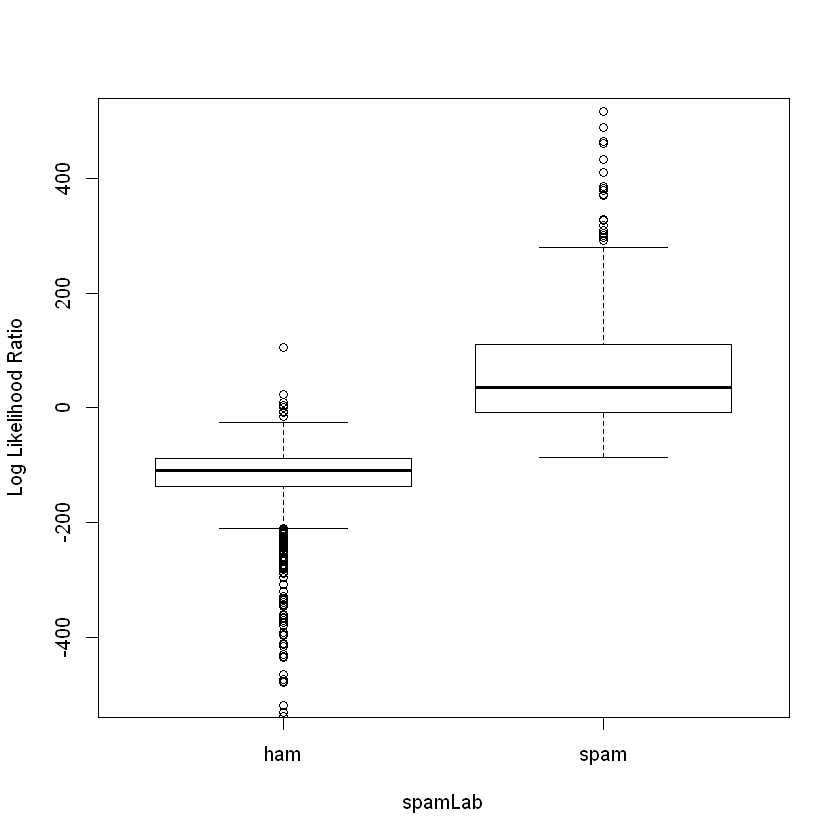

In [19]:
#pdf("SP_Boxplot.pdf", width = 6, height = 6)
spamLab = c("ham", "spam")[1 + testIsSpam]
boxplot(testLLR ~ spamLab, ylab = "Log Likelihood Ratio",
      #  main = "Log Likelihood Ratio for Randomly Chosen Test Messages",
        ylim=c(-500, 500))
#dev.off()


In [20]:
typeIErrorRate = 
function(tau, llrVals, spam)
{
  classify = llrVals > tau
  sum(classify & !spam)/sum(!spam)
}

typeIErrorRate(0, testLLR,testIsSpam)

typeIErrorRate(-20, testLLR,testIsSpam)

typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

[1] 0.003884333

[1] 0.006042296

In [21]:
typeIIErrorRates = function(llrVals, isSpam) {
    
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]
    
    
  idx = which(isSpam)
  N = length(idx)
  list(error = (1:(N))/N, values = llrVals[idx])
  }  

xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

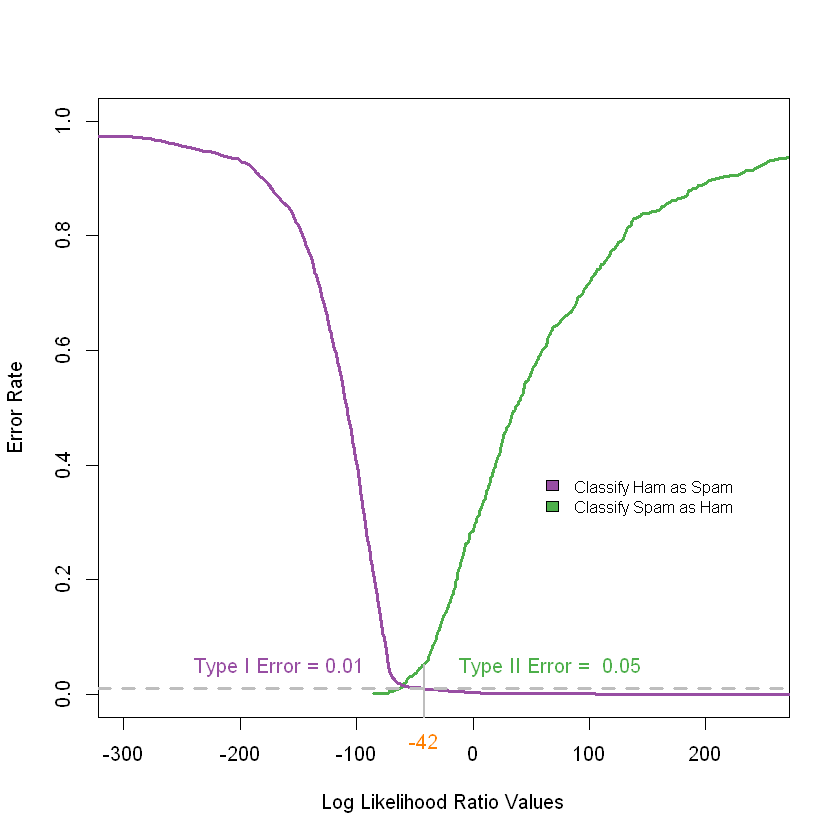

In [22]:
#pdf("LinePlotTypeI+IIErrors.pdf", width = 8, height = 6)

library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values", ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])

#dev.off()

In [23]:
k = 5
numTrain = length(trainMsgWords)
partK = sample(numTrain)
tot = k * floor(numTrain/k)
partK = matrix(partK[1:tot], ncol = k)

testFoldOdds = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  trainTabFold = computeFreqs(trainMsgWords[-foldIdx], trainIsSpam[-foldIdx])
  testFoldOdds = c(testFoldOdds, 
               sapply(trainMsgWords[ foldIdx ], computeMsgLLR, trainTabFold))
}

testFoldSpam = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  testFoldSpam = c(testFoldSpam, trainIsSpam[foldIdx])
}

xFoldI = typeIErrorRates(testFoldOdds, testFoldSpam)
xFoldII = typeIIErrorRates(testFoldOdds, testFoldSpam)
tauFoldI = round(min(xFoldI$values[xFoldI$error <= 0.01]))
tFold2 = xFoldII$error[ xFoldII$values < tauFoldI ]

smallNums = rep((1/2)^40, 2000000)

In [24]:
largeNum = 10000

print(sum(smallNums), digits = 20)

print(largeNum + sum(smallNums), digits = 20)

for (i in 1:length(smallNums)) {
  largeNum = largeNum + smallNums[i]
}
print(largeNum, digits = 20)

sampleSplit = lapply(sampleEmail, splitMessage)

header = sampleSplit[[1]]$header
header[1:12]

header[1] = sub("^From", "Top-From:", header[1])
header[1]

[1] 1.8189894035458565e-06
[1] 10000.000001818989
[1] 10000


[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                                      
 [2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"                                          
 [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                                       
 [4] "Received: from localhost (localhost [127.0.0.1])"                                                  
 [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"                                 
 [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                                      
 [7] "Received: from phobos [127.0.0.1]"                                                                 
 [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                                         
 [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"                          
[10] "Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by"
[11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"                            
[12] "    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100"

[1] "Top-From: exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"

In [25]:
headerPieces = read.dcf(textConnection(header), all = TRUE)

headerPieces[, "Delivered-To"]


headerVec = unlist(headerPieces)
dupKeys = sapply(headerPieces, function(x) length(unlist(x)))
names(headerVec) = rep(colnames(headerPieces), dupKeys)

headerVec[ which(names(headerVec) == "Delivered-To") ]

length(headerVec)

length(unique(names(headerVec)))

processHeader = function(header)
{
       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])
  
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)
}


[[1]]
[1] "zzzz@localhost.netnoteinc.com"              
[2] "exmh-workers@listman.spamassassin.taint.org"

Delivered-To 
              "zzzz@localhost.netnoteinc.com" 
                                 Delivered-To 
"exmh-workers@listman.spamassassin.taint.org"

[1] 36

[1] 26

In [26]:
headerList = lapply(sampleSplit, 
                    function(msg) {
                      processHeader(msg$header)} )

contentTypes = sapply(headerList, function(header) 
                                        header["Content-Type"])
names(contentTypes) = NULL
contentTypes

hasAttach = grep("^ *multi", tolower(contentTypes))
hasAttach

boundaries = getBoundary(contentTypes[ hasAttach ])
boundaries

boundary = boundaries[9]
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

diff(c(bStringLocs[-1], eStringLoc))

[1] "text/plain; charset=us-ascii"                                                                                   
 [2] "text/plain; charset=US-ASCII"                                                                                   
 [3] "text/plain; charset=US-ASCII"                                                                                   
 [4] "text/plain; charset=\"us-ascii\""                                                                               
 [5] "text/plain; charset=US-ASCII"                                                                                   
 [6] "multipart/signed;\nboundary=\"==_Exmh_-1317289252P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""
 [7] NA                                                                                                               
 [8] "multipart/alternative;\nboundary=\"----=_NextPart_000_00C1_01C25017.F2F04E20\""                                 
 [9] "multipart/alternative; boundary=Apple-Mail-2-874629474"                                                         
[10] "multipart/signed;\nboundary=\"==_Exmh_-518574644P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[11] "multipart/related;\nboundary=\"------------090602010909000705010009\""                                          
[12] "multipart/signed;\nboundary=\"==_Exmh_-451422450P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[13] "multipart/signed;\nboundary=\"==_Exmh_267413022P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""  
[14] "multipart/mixed;\nboundary=\"----=_NextPart_000_0005_01C26412.7545C1D0\""                                       
[15] "multipart/alternative;\nboundary=\"------------080209060700030309080805\""

[1]  6  8  9 10 11 12 13 14 15

[1] "==_Exmh_-1317289252P"                     
[2] "----=_NextPart_000_00C1_01C25017.F2F04E20"
[3] "Apple-Mail-2-874629474"                   
[4] "==_Exmh_-518574644P"                      
[5] "------------090602010909000705010009"     
[6] "==_Exmh_-451422450P"                      
[7] "==_Exmh_267413022P"                       
[8] "----=_NextPart_000_0005_01C26412.7545C1D0"
[9] "------------080209060700030309080805"

[1]  2 35

[1] 77

[1] 42

In [27]:
### This code has mistakes in it - and we fix them later!
processAttach = function(body, contentType){
  
  boundary = getBoundary(contentType)
  
  bString = paste("--", boundary, "$", sep = "")
  bStringLocs = grep(bString, body)
  
  eString = paste("--", boundary, "--$", sep = "")
  eStringLoc = grep(eString, body)
  
  n = length(body)
  
  if (length(eStringLoc) == 0) eStringLoc = n + 1
  if (length(bStringLocs) == 1) attachLocs = NULL
  else attachLocs = c(bStringLocs[-1],  eStringLoc)
  
  msg = body[ (bStringLocs[1] + 1) : min(n, (bStringLocs[2] - 1), 
                                         na.rm = TRUE)]
  
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      contentTypeLoc = grep("[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      contentType = body[ begL + contentTypeLoc]
      contentType = gsub('"', "", contentType )
      MIMEType = sub(" *Content-Type: *([^;]*);?.*", "\\1", contentType)
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachInfo = NULL) )
  else return(list(body = msg, 
                   attachDF = data.frame(aLen = attachLens, 
                                         aType = attachTypes,
                                         stringsAsFactors = FALSE)))                                
}


In [28]:
bodyList = lapply(sampleSplit, function(msg) msg$body)
attList = mapply(processAttach, bodyList[hasAttach], 
                 contentTypes[hasAttach], 
                 SIMPLIFY = FALSE)

lens = sapply(attList, function(processedA) 
                           processedA$attachDF$aLen)
head(lens)  # will cause an error with the first message. its ok.
attList[[2]]$attachDF

body = bodyList[hasAttach][[2]]
length(body)

body[35:45]

$`./From 2ds/messages/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 12

$`./From 2ds/messages/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 44 44

$`./From 2ds/messages/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 83

$`./From 2ds/messages/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 12

$`./From 2ds/messages/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
NULL

$`./From 2ds/messages/easy_ham/00389.8606961eaeef7b921ce1c53773248d69`
[1] 12

aLen,aType
<int>,<chr>
44,text/html
44,<META http-equiv=3DContent-Type content=3Dtext/html; =


[1] 86

[1] ""                                                                
 [2] "------=_NextPart_000_00C1_01C25017.F2F04E20"                     
 [3] "Content-Type: text/html;"                                        
 [4] "\tcharset=\"Windows-1252\""                                       
 [5] "Content-Transfer-Encoding: quoted-printable"                     
 [6] ""                                                                
 [7] "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0 Transitional//EN\">"
 [8] "<HTML><HEAD>"                                                    
 [9] "<META http-equiv=3DContent-Type content=3D\"text/html; ="        
[10] "charset=3Dwindows-1252\">"                                       
[11] "<META content=3D\"MSHTML 6.00.2716.2200\" name=3DGENERATOR>"

In [29]:
processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}                       

readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}



In [30]:
processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)
  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
 
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}

In [31]:
emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))      
emailStruct = unlist(emailStruct, recursive = FALSE)

sampleStruct = emailStruct[ indx ]

save(emailStruct, file="emailXX.rda")

header = sampleStruct[[1]]$header
subject = header["Subject"]
els = strsplit(subject, "")
all(els %in% LETTERS)

testSubject = c("DEAR MADAME", "WINNER!", "")

els = strsplit(testSubject, "")
sapply(els, function(subject) all(subject %in% LETTERS))


gsub("[[:punct:] ]", "", testSubject)

gsub("[^[:alpha:]]", "", testSubject)


Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'"
Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'"
Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'"
Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/spam/00136.faa39d8e816c70f23b4bb8758d8a74f0'"
Warning message in FUN(X[[i]], ...):
"incomplete final line found on './From 2ds/messages/spam/0143.260a940290dcb61f9327b224a368d4af'"


[1] FALSE

[1] FALSE FALSE  TRUE

[1] "DEARMADAME" "WINNER"     ""

[1] "DEARMADAME" "WINNER"     ""

In [32]:
isYelling = function(msg) {
  if ( "Subject" %in% names(msg$header) ) {
     el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
     if (nchar(el) > 0) 
        nchar(gsub("[A-Z]", "", el)) < 1
     else 
        FALSE
  } else 
    NA
}

perCaps =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters
  body = gsub("[^[:alpha:]]", "", body)
  capText = gsub("[^A-Z]", "", body)
  100 * nchar(capText)/nchar(body)
}


In [33]:
sapply(sampleStruct, perCaps)

funcList = list( 
 isRe = function(msg) {
       "Subject" %in% names(msg$header) &&
         length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
  },
  numLines = function(msg) 
                length(msg$body),
  isYelling = function(msg) {
    if ( "Subject" %in% names(msg$header) ) {
       el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
       if (nchar(el) > 0) 
         nchar(gsub("[A-Z]", "", el)) < 1
       else 
         FALSE
    }
    else NA
  },
  perCaps = function(msg) {
    body = paste(msg$body, collapse = "")

         # Return NA if the body of the message is "empty"
    if(length(body) == 0 || nchar(body) == 0) return(NA)

         # Eliminate non-alpha characters
    body = gsub("[^[:alpha:]]", "", body)
    capText = gsub("[^A-Z]", "", body)
    100 * nchar(capText)/nchar(body)
  }
)

./From 2ds/messages/easy_ham1   ./From 2ds/messages/easy_ham2 
                       4.451039                        7.491289 
  ./From 2ds/messages/easy_ham3   ./From 2ds/messages/easy_ham4 
                       7.436096                        5.090909 
  ./From 2ds/messages/easy_ham5  ./From 2ds/messages/easy_ham15 
                       6.116643                        7.732865 
 ./From 2ds/messages/easy_ham27  ./From 2ds/messages/easy_ham68 
                       5.523256                       10.059172 
 ./From 2ds/messages/easy_ham69 ./From 2ds/messages/easy_ham329 
                      10.885806                        6.472492 
./From 2ds/messages/easy_ham404 ./From 2ds/messages/easy_ham427 
                       9.597258                       11.970075 
./From 2ds/messages/easy_ham516 ./From 2ds/messages/easy_ham852 
                       9.233792                        1.655629 
./From 2ds/messages/easy_ham971 
                       6.417910

In [34]:
lapply(funcList, function(func) 
                   sapply(sampleStruct, function(msg) func(msg)))

createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e))
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

sampleDF = createDerivedDF(sampleStruct)
head(sampleDF)

$isRe
  ./From 2ds/messages/easy_ham1   ./From 2ds/messages/easy_ham2 
                           TRUE                           FALSE 
  ./From 2ds/messages/easy_ham3   ./From 2ds/messages/easy_ham4 
                          FALSE                           FALSE 
  ./From 2ds/messages/easy_ham5  ./From 2ds/messages/easy_ham15 
                           TRUE                            TRUE 
 ./From 2ds/messages/easy_ham27  ./From 2ds/messages/easy_ham68 
                           TRUE                           FALSE 
 ./From 2ds/messages/easy_ham69 ./From 2ds/messages/easy_ham329 
                           TRUE                            TRUE 
./From 2ds/messages/easy_ham404 ./From 2ds/messages/easy_ham427 
                           TRUE                            TRUE 
./From 2ds/messages/easy_ham516 ./From 2ds/messages/easy_ham852 
                           TRUE                           FALSE 
./From 2ds/messages/easy_ham971 
                           TRUE 

$numLines
  ./From 2ds/messages/easy_ham1   ./From 2ds/messages/easy_ham2 
                             50                              26 
  ./From 2ds/messages/easy_ham3   ./From 2ds/messages/easy_ham4 
                             38                              32 
  ./From 2ds/messages/easy_ham5  ./From 2ds/messages/easy_ham15 
                             31                              54 
 ./From 2ds/messages/easy_ham27  ./From 2ds/messages/easy_ham68 
                             35                              36 
 ./From 2ds/messages/easy_ham69 ./From 2ds/messages/easy_ham329 
                             65                              58 
./From 2ds/messages/easy_ham404 ./From 2ds/messages/easy_ham427 
                             70                              31 
./From 2ds/messages/easy_ham516 ./From 2ds/messages/easy_ham852 
                             38                              28 
./From 2ds/messages/easy_ham971 
                             34 

$isYelling
  ./From 2ds/messages/easy_ham1.Subject   ./From 2ds/messages/easy_ham2.Subject 
                                  FALSE                                   FALSE 
  ./From 2ds/messages/easy_ham3.Subject   ./From 2ds/messages/easy_ham4.Subject 
                                  FALSE                                   FALSE 
  ./From 2ds/messages/easy_ham5.Subject  ./From 2ds/messages/easy_ham15.Subject 
                                  FALSE                                   FALSE 
 ./From 2ds/messages/easy_ham27.Subject  ./From 2ds/messages/easy_ham68.Subject 
                                  FALSE                                   FALSE 
 ./From 2ds/messages/easy_ham69.Subject ./From 2ds/messages/easy_ham329.Subject 
                                  FALSE                                   FALSE 
./From 2ds/messages/easy_ham404.Subject ./From 2ds/messages/easy_ham427.Subject 
                                  FALSE                                   FALSE 
./From 2ds/messages/easy_ham516.Subject ./From 2ds/messages/easy_ham852.Subject 
                                  FALSE                                   FALSE 
./From 2ds/messages/easy_ham971.Subject 
                                  FALSE 

$perCaps
  ./From 2ds/messages/easy_ham1   ./From 2ds/messages/easy_ham2 
                       4.451039                        7.491289 
  ./From 2ds/messages/easy_ham3   ./From 2ds/messages/easy_ham4 
                       7.436096                        5.090909 
  ./From 2ds/messages/easy_ham5  ./From 2ds/messages/easy_ham15 
                       6.116643                        7.732865 
 ./From 2ds/messages/easy_ham27  ./From 2ds/messages/easy_ham68 
                       5.523256                       10.059172 
 ./From 2ds/messages/easy_ham69 ./From 2ds/messages/easy_ham329 
                      10.885806                        6.472492 
./From 2ds/messages/easy_ham404 ./From 2ds/messages/easy_ham427 
                       9.597258                       11.970075 
./From 2ds/me

,isRe,numLines,isYelling,perCaps
,<lgl>,<int>,<lgl>,<dbl>
./From 2ds/messages/easy_ham1,TRUE,50,FALSE,4.451039
./From 2ds/messages/easy_ham2,FALSE,26,FALSE,7.491289
./From 2ds/messages/easy_ham3,FALSE,38,FALSE,7.436096
./From 2ds/messages/easy_ham4,FALSE,32,FALSE,5.090909
./From 2ds/messages/easy_ham5,TRUE,31,FALSE,6.116643
./From 2ds/messages/easy_ham15,TRUE,54,FALSE,7.732865


In [35]:
funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines =
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore =
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = 
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt =
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = 
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority =
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec =
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps =
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo =
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)



In [36]:
SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")


getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

emailDF = createDerivedDF(emailStruct)
dim(emailDF)
save(emailDF, file = "spamAssassinDerivedDF.rda")

[1] 9348   30

In [37]:
################################
load("spamAssassinDerivedDF.rda")
dim(emailDF)

perCaps2 =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters and empty lines 
  body = gsub("[^[:alpha:]]", "", body)
  els = unlist(strsplit(body, ""))
  ctCap = sum(els %in% LETTERS)
  100 * ctCap / length(els)
}


[1] 9348   30

In [38]:
pC = sapply(emailStruct, perCaps)
pC2 = sapply(emailStruct, perCaps2)
identical(pC, pC2)

indNA = which(is.na(emailDF$subExcCt))

indNoSubject = which(sapply(emailStruct, 
                            function(msg) 
                              !("Subject" %in% names(msg$header))))

all(indNA == indNoSubject)

all(emailDF$bodyCharCt > emailDF$numLines)


x.at = c(1,10,100,1000,10000,100000)
y.at = c(1, 5, 10, 50, 100, 500, 5000)
nL = 1 + emailDF$numLines
nC = 1 + emailDF$bodyCharCt

[1] TRUE

Warning message in indNA == indNoSubject:
"longer object length is not a multiple of shorter object length"


[1] FALSE

[1] TRUE

null device 
          1

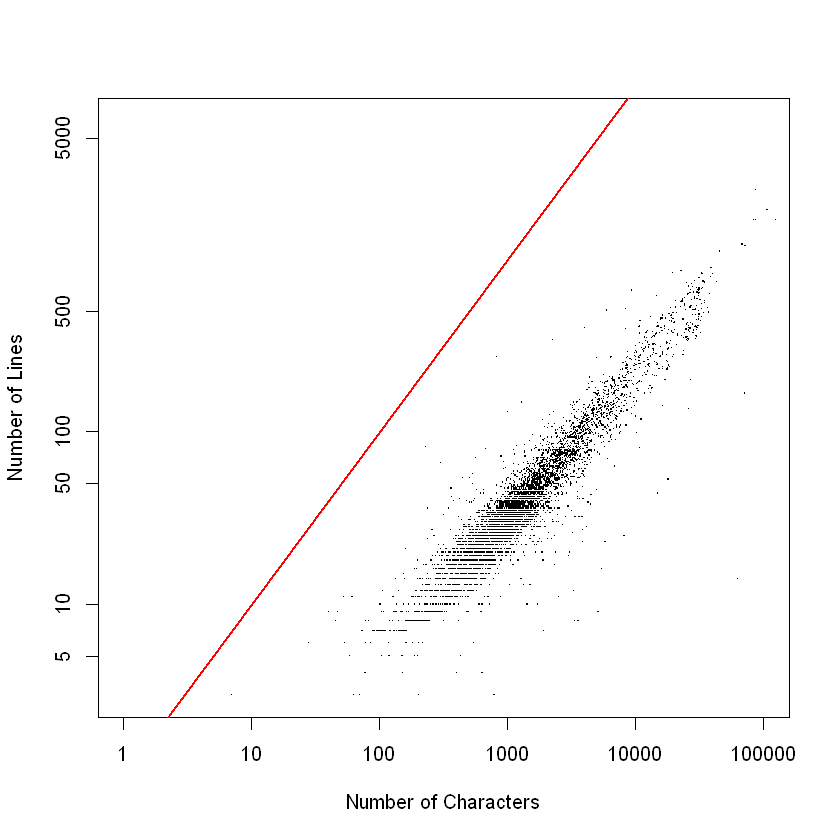

In [39]:
#pdf("ScatterPlotNumLinesNumChars.pdf", width = 6, height = 4.5)
plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 
abline(a=0, b=1, col="red", lwd = 2)
dev.off()

#pdf("SPAM_boxplotsPercentCaps.pdf", width = 5, height = 5)

percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        ylab = "Percent Capitals (log)")

#dev.off()

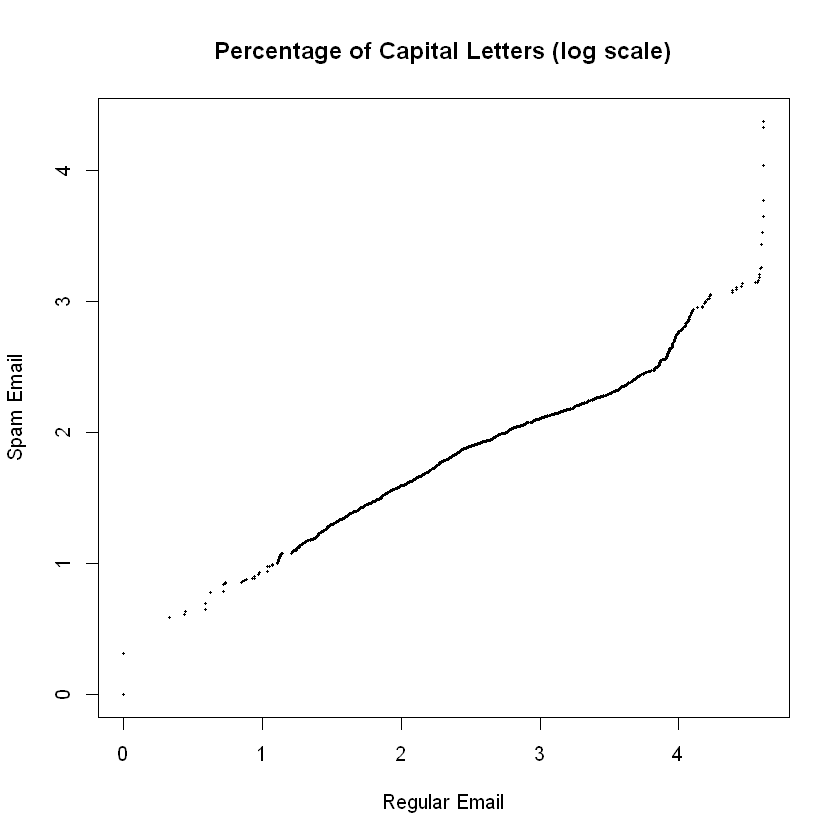

In [40]:
logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)

    isSpamLabs
      ham spam
  0  6624 2158
  1   314  230
  2    11    6
  4     0    1
  5     1    2
  18    1    0

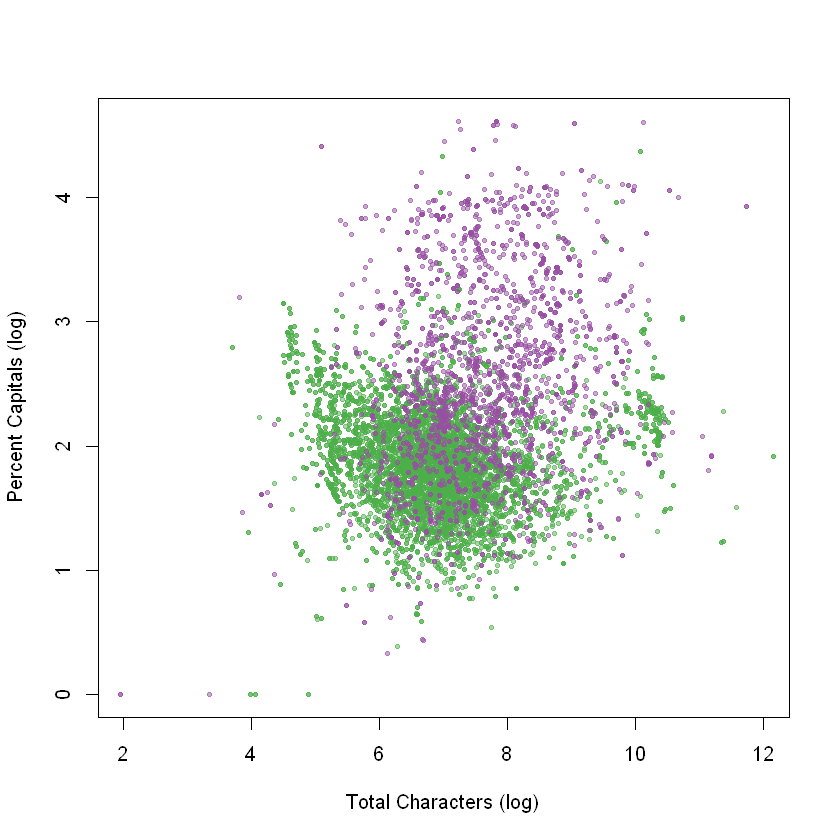

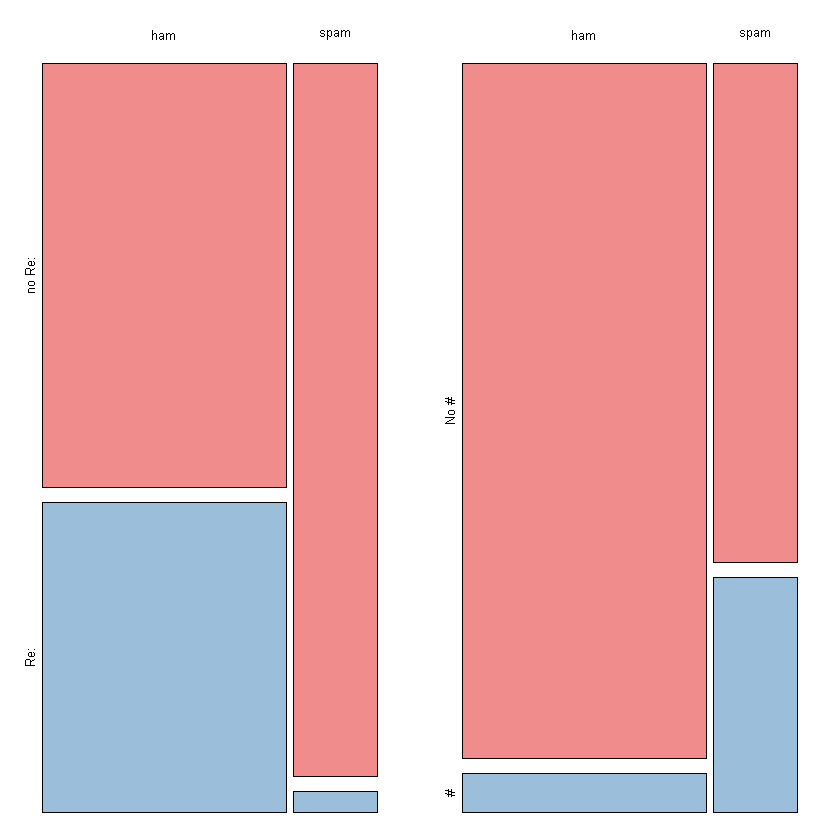

In [41]:
#pdf("SPAM_scatterplotPercentCapsTotChars.pdf", width = 8, height = 6)
 
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     xlim = c(2,12), pch = 19, cex = 0.5)

#dev.off()

table(emailDF$numAtt, isSpamLabs)
#pdf("SPAM_mosaicPlots.pdf", width = 8, height = 4)

oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")

par(oldPar)

#dev.off()

library(rpart)

setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFrp = setupRpart(emailDF)

__Textbook question 19__  
Consider the other parameters that can be used to control the recursive partitioning process. Read the documentation for them in the rpart.control() documentation. Also, carry out an Internet search for more information on how to tweak the rpart() tuning parameters. Experiment with values for these parameters.Do the trees that result make sense with your understanding of how the parameters are used? Can you improve the prediction using them?

__Dan:__ Captured this (below) from the documentation so we can refer to it as we experiment.

<img src="./Plots/rpartControl.PNG">

__Dan:__ We assume that it is preferable to classify spam as not-spam rather than not-spam as spam therefore we want to keep type 1 error low.

In [42]:
set.seed(418910)
testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testDF = 
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

__Dan:__ We will set cp to -1 (do not stop growing trees) which will over fit but we will prune the tree later.

In [43]:
head(trainDF)

,isSpam,isRe,underscore,priority,isInReplyTo,sortedRec,subPunc,multipartText,hasImages,isPGPsigned,...,subQuesCt,numAtt,numRec,perCaps,hour,perHTML,subBlanks,forwards,avgWordLen,numDlr
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
./From 2ds/messages/spam2,T,F,F,F,F,T,F,F,F,F,...,0,0,1,7.984791,12,0,16.98113,0.000000,3.954887,0
./From 2ds/messages/spam3,T,F,F,F,F,T,F,F,F,F,...,0,0,1,8.894231,13,0,46.47887,0.000000,3.747748,0
./From 2ds/messages/spam4,T,T,F,F,F,F,F,F,F,F,...,0,0,1,11.123788,15,0,13.79310,4.444444,4.449239,0
./From 2ds/messages/spam5,T,F,F,F,F,T,F,F,F,F,...,0,0,1,6.479482,15,0,15.62500,0.000000,4.247706,0
./From 2ds/messages/spam6,T,F,F,F,F,T,F,F,F,F,...,0,0,1,24.920331,15,0,12.12121,0.000000,3.912718,10
./From 2ds/messages/spam7,T,F,F,F,F,T,F,F,F,F,...,0,0,1,4.669261,17,0,14.63415,0.000000,4.283333,0


In [44]:
str(trainDF)

'data.frame':	6232 obs. of  30 variables:
 $ isSpam       : Factor w/ 2 levels "F","T": 2 2 2 2 2 2 2 2 2 2 ...
 $ isRe         : Factor w/ 2 levels "F","T": 1 1 2 1 1 1 1 1 1 1 ...
 $ underscore   : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ priority     : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ isInReplyTo  : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ sortedRec    : Factor w/ 2 levels "F","T": 2 2 1 2 2 2 2 2 1 2 ...
 $ subPunc      : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ multipartText: Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ hasImages    : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ isPGPsigned  : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ subSpamWords : Factor w/ 2 levels "F","T": 2 2 1 2 1 1 1 1 1 1 ...
 $ noHost       : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ numEnd       : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 2 2 1 ...
 $ isYelling    : Factor w/ 2 levels "F","T": 1 

In [45]:
dim(trainDF)

[1] 6232   30

In [46]:
rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class",cp = -1)

__Dan:__ Note to self, try without pruning. Maybe crossfolds account for o verfitting.

__Dan:__ Now to prune our overfit tree

_Sourced from https://www.gormanalysis.com/blog/decision-trees-in-r-using-rpart/
"As a rule of thumb, it’s best to prune a decision tree using the cp of smallest tree that is within one standard deviation of the tree with the smallest xerror."_

__Dan:__  Using printcp to see our results from overfit tree.

In [47]:
printcp(rpartFit)


Classification tree:
rpart(formula = isSpam ~ ., data = trainDF, method = "class", 
    cp = -1)

Variables actually used in tree construction:
 [1] avgWordLen    bodyCharCt    forwards      hour          isDear       
 [6] isInReplyTo   isRe          isWrote       isYelling     multipartText
[11] numAtt        numDlr        numEnd        numLines      numRec       
[16] perCaps       perHTML       subBlanks     subExcCt      subSpamWords 
[21] underscore   

Root node error: 1598/6232 = 0.25642

n= 6232 

            CP nsplit rel error  xerror     xstd
1   0.31163955      0   1.00000 1.00000 0.021571
2   0.09386733      1   0.68836 0.69337 0.018888
3   0.07008761      2   0.59449 0.59950 0.017818
4   0.04443054      3   0.52441 0.53317 0.016972
5   0.02346683      4   0.47997 0.48936 0.016365
6   0.01960784      6   0.43304 0.46934 0.016073
7   0.01877347      9   0.37422 0.44243 0.015667
8   0.01627034     10   0.35544 0.40676 0.015099
9   0.01251564     11   0.33917 0.36984 0.0144

__Dan:__ In our case the best xerror is .24906 with standard deviation .012079. So we use CP = 0.00229453 from #17 above.

In [48]:
rpartFitCpExperiment = rpart(isSpam ~ ., data = trainDF, method = "class",cp = 0.00229453)

In [49]:
# Metric for rpartFitCpExperiment

predicted13<- predict(rpartFitCpExperiment, newdata = testDF, type = "class")


f1_val_rpartFit13 <- F1_Score(y_pred = predicted13, y_true = testDF$isSpam, positive = "T")
precision_rpartFit13 <- Precision(y_pred = predicted13, y_true = testDF$isSpam, positive = "T")
recall_rpartFit13  <- Recall(y_pred = predicted13, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit13, precision_rpartFit13, recall_rpartFit13)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFitCpExperiment:")
return(result)

[1] "Metrics for rpartFitCpExperiment:"


F1-Score Precision    Recall 
0.8629442 0.8751609 0.8510638

In [50]:
rpartFitCpExperiment$variable.importance

perCaps    bodyCharCt      numLines       perHTML        numDlr 
  603.4482230   393.7254711   344.1590795   271.4042677   159.2896836 
  isInReplyTo    avgWordLen      forwards          isRe       isWrote 
  141.2601682   139.7618826   139.4110087   110.5306258    88.5781493 
     subExcCt     subBlanks multipartText        numEnd        numAtt 
   87.2118091    71.0587370    49.3549746    48.5059496    42.7912353 
       numRec        isDear     isYelling    underscore          hour 
   41.0907467    39.1225586    32.5346504    25.1621734    23.9239845 
 subSpamWords     subQuesCt      priority   isPGPsigned        noHost 
   20.4888231    12.4759144     5.0321976     4.5609679     2.6186208 
    isOrigMsg       subPunc     hasImages 
    1.9463967     1.0181127     0.8012616

__DD:__ Plot our pruned tree

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


F    T 
2220   97

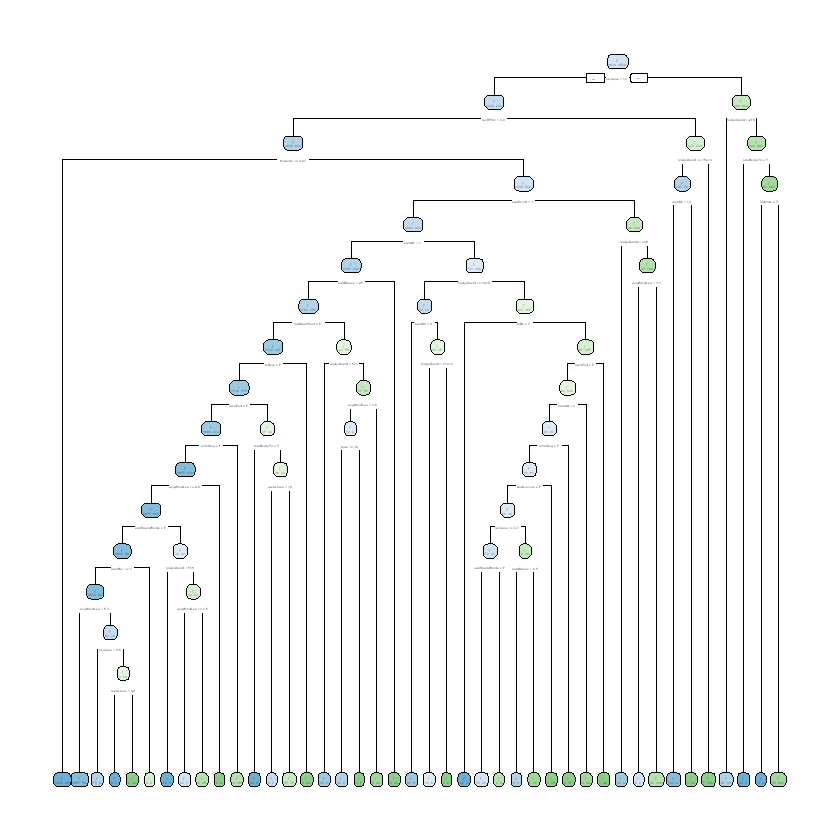

In [51]:
library(rpart.plot)
library(RColorBrewer)

rpart.plot(rpartFitCpExperiment, extra = 1)
predictions = predict(rpartFitCpExperiment, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")

predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

predsForSpam = predictions[ testDF$isSpam == "T" ]


In [52]:
paste("Type 1 Error = ",(sum(predsForHam == "T") / length(predsForHam)))
paste("Type 2 Error = ",(sum(predsForSpam == "F") / length(predsForSpam)))

[1] "Type 1 Error =  0.0418644799309452"

[1] "Type 2 Error =  0.148936170212766"

We did not improve on the original Type 1 Error _.038_ achieved by the code Dr. Slater's provided. How ever it is interesting to demonstrate that the "rule of thumb" produced comparable results.

Now we try adjusting the "minsplit" using fancy fits function

In [53]:
minsplitvals = c(10:30)

In [54]:
# minsplitvals 

In [55]:
minbucket = c(10:30)

In [56]:
fits = lapply(minbucket, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(minbucket=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })

In [57]:
errs

typeI,0.06473889,0.06473889,0.06473889,0.06473889,0.06473889,0.06473889,0.06473889,0.06473889,0.06473889,0.06473889,...,0.06473889,0.06473889,0.06473889,0.06473889,0.06473889,0.06473889,0.07078118,0.07078118,0.0699180,0.0699180
typeII,0.18648310,0.18648310,0.18648310,0.18648310,0.18648310,0.18648310,0.18648310,0.18648310,0.18648310,0.18648310,...,0.18648310,0.18648310,0.18648310,0.18648310,0.20400501,0.20400501,0.20275344,0.20275344,0.2027534,0.2027534


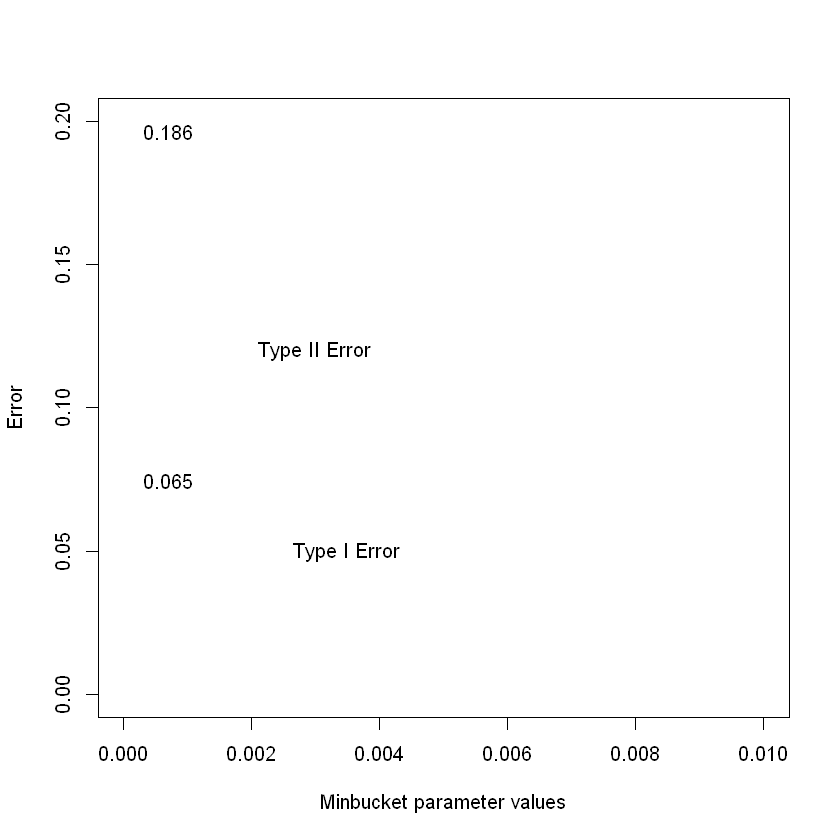

In [58]:

#pdf("SPAM_rpartTypeIandII.pdf", width = 8, height = 7)
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ minbucket, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
     ylab="Error", xlab="Minbucket parameter values")
points(errs[2,] ~ minbucket, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = minbucket[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

#dev.off()

In [59]:
#save(emailDFrp,file="data.Rda")
load(file="./From 2ds/data.Rda")

__Textbook question 20__  
In Section 3.6.3 we used the test set that we had put aside to both select τ, the threshold for the log odds, and to evaluate the Type I and II errors incurred when we use this threshold. Ideally, we choose τ from another set of messages that is both independent of our training data and our test data. The method of cross-validation is designed to use the training set for training and validating the model. Implement 5-fold cross-validation to choose τ and assess the error rate with our training data. To do this, follow the steps:  
__(a)__ Use the sample() function to permute the indices of the training set, and organize these permuted indices into 5 equal-size sets, called folds.  
__(b)__ Foreachfold,takethecorrespondingsubsetfromthetrainingdatatouseasa‘test’ set. Use the remaining messages in the training data as the training set. Apply the functions developed in Section 3.6 to estimate the probabilities that a word occurs in a message given it is spam or ham, and use these probabilities to compute the log likelihood ratio for the messages in the training set.  
__(c)__ Pool all of the LLR values from the messages in all of the folds, i.e., from all of the training data, and use these values and the typeIErrorRate() function to select a threshold that achieves a 1% Type I error.  
__(d)__ Apply this threshold to our original/real test set and ﬁnd its Type I and Type II errors.

### LJ note:
### plan to do these things:

#### 1. see how the cp will affect on the tree while holding others constant using rpart

#### 2. set cp small and find optimal cp, then prune tree based on cp
prune fit0
#### see how pruning affect the model performance

#### 3. focus on tune cp and MaxDepth and keep other values constant.
(rpartFit 0-10. combination of 9, plus rpartFit0 - vanilla model.)
cp 0.0001  0.002  0.01

MaxDepth 4,6,10 

cp-- prevent overfitting. higher, less split. too low underfit; too high overfit. max value is 1

MaxDepth -- of the final tree

minsplit --any node with number of n will not get further split.
 the number of required classified observations in a node before a split can happen. seems default 20. set it to 10? or just keep 20.

xval -- the number (x) of cross validations to be carried out on the data. default 10. repeat 5 fold cross validation for 10 times.

did not test on other parameters like maxcomplete.



#### 4. use rpart package see how the cp will affect on the tree while holding others constant
#### caret package can grid search cp, also print F1, prec, rec

## Task 1
### use rpart package see how the cp will affect on the tree while holding others constant

In [60]:
# function to fit the given model
rpartFitFunc = function(rpartFit,fileNamePostfix) {
    print(rpartFit)
    prp(rpartFit, extra = 1)
    
    fileName = paste('SPAM__rpartTree',fileNamePostfix,'.png',sep="")
    dev.copy(png,fileName)
    dev.off()

    predictions = predict(rpartFit, 
           newdata = testDF[, names(testDF) != "isSpam"],
           type = "class")

    predsForHam = predictions[ testDF$isSpam == "F" ]
    summary(predsForHam)

    sum(predsForHam == "T") / length(predsForHam)

    predsForSpam = predictions[ testDF$isSpam == "T" ]
    sum(predsForSpam == "F") / length(predsForSpam)

    complexityVals = c(seq(0.00001, 0.0001, length=19),
                       seq(0.0001, 0.001, length=19), 
                       seq(0.001, 0.005, length=9),
                       seq(0.005, 0.01, length=9))
    
    fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

    spam = testDF$isSpam == "T"
    numSpam = sum(spam)
    numHam = sum(!spam)
    errs = sapply(fits, function(preds) {
                          typeI = sum(preds[ !spam ] == "T") / numHam
                          typeII = sum(preds[ spam ] == "F") / numSpam
                          c(typeI = typeI, typeII = typeII)
                         })
    
    cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
    plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
         lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
         ylab="Error", xlab="complexity parameter values")
    points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

    text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
         labels=c("Type II Error", "Type I Error"))

    minI = which(errs[1,] == min(errs[1,]))[1]
    abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

    text(0.0007, errs[1, minI]+0.01, 
         formatC(errs[1, minI], digits = 2))
    text(0.0007, errs[2, minI]+0.01, 
         formatC(errs[2, minI], digits = 3))

    }

n= 6232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

     1) root 6232 1598 F (0.743581515 0.256418485)  
       2) perCaps< 12.86122 5342  904 F (0.830774991 0.169225009)  
         4) perHTML< 3.926441 4912  614 F (0.875000000 0.125000000)  
           8) forwards>=0.2055889 2305   15 F (0.993492408 0.006507592)  
            16) forwards>=4.494949 2131    3 F (0.998592210 0.001407790) *
            17) forwards< 4.494949 174   12 F (0.931034483 0.068965517)  
              34) perCaps< 10.68646 164    8 F (0.951219512 0.048780488)  
                68) numDlr< 0.5 129    0 F (1.000000000 0.000000000) *
                69) numDlr>=0.5 35    8 F (0.771428571 0.228571429)  
                 138) isInReplyTo=T 14    0 F (1.000000000 0.000000000) *
                 139) isInReplyTo=F 21    8 F (0.619047619 0.380952381)  
                   278) avgWordLen>=4.725079 11    1 F (0.909090909 0.090909091) *
                   279) avgWordLen< 4.725079 10    3 T (0.300

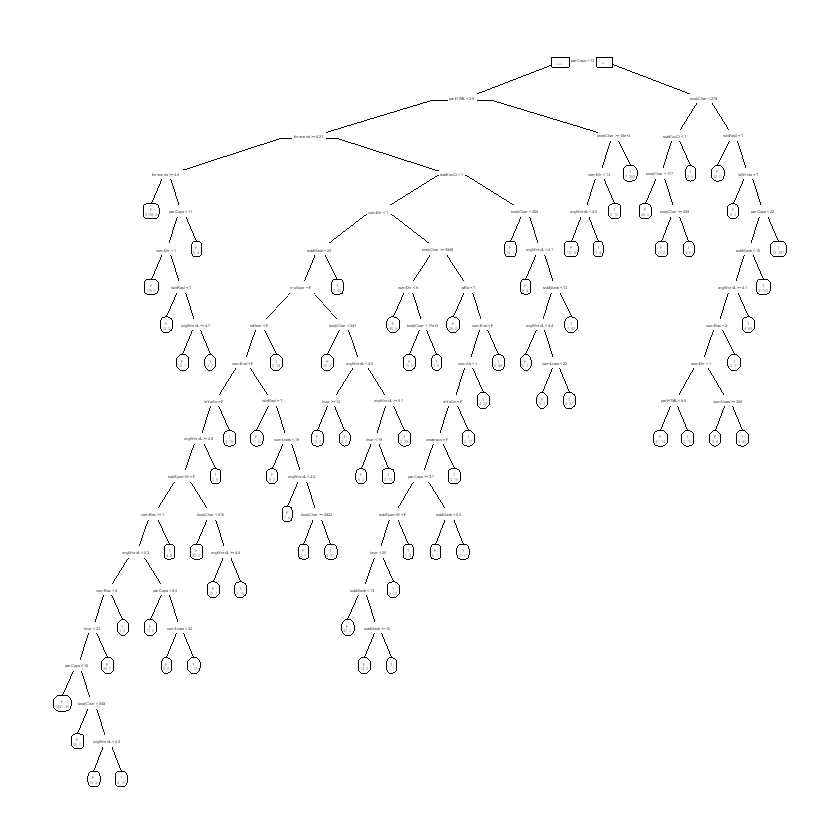

n= 6232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

    1) root 6232 1598 F (0.743581515 0.256418485)  
      2) perCaps< 12.86122 5342  904 F (0.830774991 0.169225009)  
        4) perHTML< 3.926441 4912  614 F (0.875000000 0.125000000)  
          8) forwards>=0.2055889 2305   15 F (0.993492408 0.006507592) *
          9) forwards< 0.2055889 2607  599 F (0.770233985 0.229766015)  
           18) subExcCt< 0.5 2444  480 F (0.803600655 0.196399345)  
             36) numDlr< 0.5 2053  292 F (0.857769118 0.142230882)  
               72) subBlanks< 24.72727 2013  252 F (0.874813711 0.125186289)  
                144) multipartText=F 1915  197 F (0.897127937 0.102872063)  
                  288) isDear=F 1891  173 F (0.908514014 0.091485986)  
                    576) numEnd=F 1815  134 F (0.926170799 0.073829201)  
                     1152) isYelling=F 1796  119 F (0.933741648 0.066258352)  
                       2304) avgWordLen>=2.76982 1787  110 F (0.93844

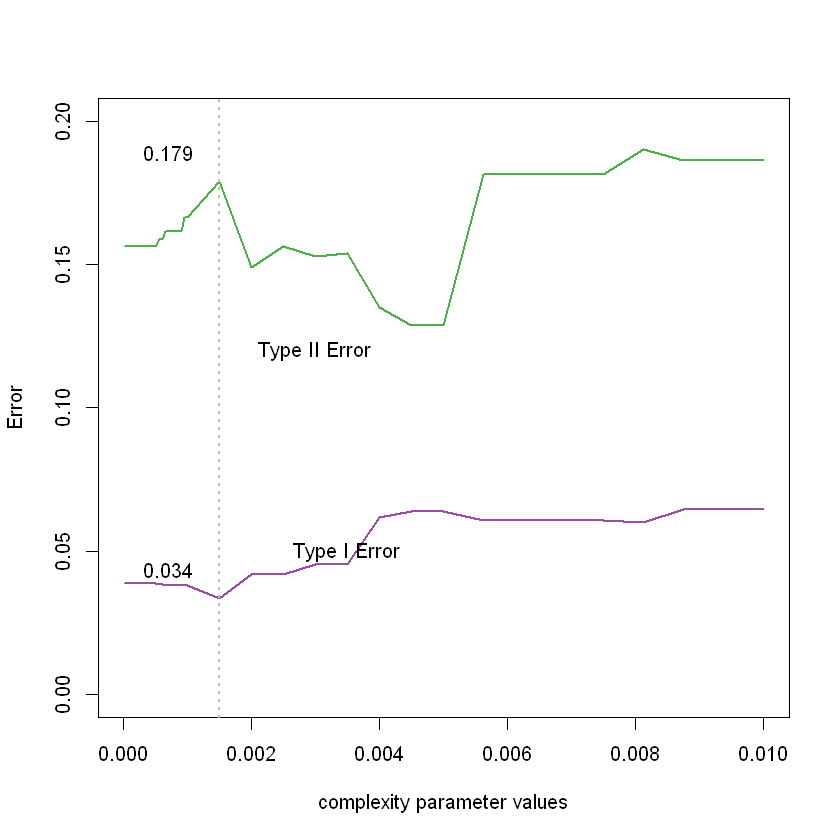

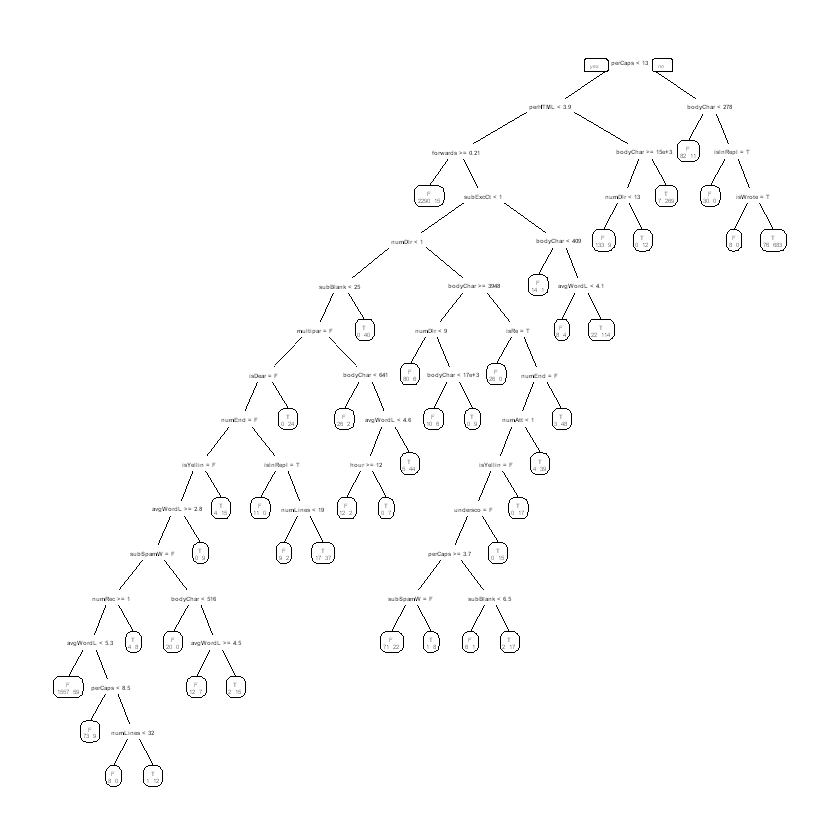

n= 6232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 6232 1598 F (0.743581515 0.256418485)  
    2) perCaps< 12.86122 5342  904 F (0.830774991 0.169225009)  
      4) perHTML< 3.926441 4912  614 F (0.875000000 0.125000000)  
        8) forwards>=0.2055889 2305   15 F (0.993492408 0.006507592) *
        9) forwards< 0.2055889 2607  599 F (0.770233985 0.229766015)  
         18) subExcCt< 0.5 2444  480 F (0.803600655 0.196399345)  
           36) numDlr< 0.5 2053  292 F (0.857769118 0.142230882)  
             72) subBlanks< 24.72727 2013  252 F (0.874813711 0.125186289)  
              144) multipartText=F 1915  197 F (0.897127937 0.102872063)  
                288) isDear=F 1891  173 F (0.908514014 0.091485986) *
                289) isDear=T 24    0 T (0.000000000 1.000000000) *
              145) multipartText=T 98   43 T (0.438775510 0.561224490)  
                290) bodyCharCt< 640.5 28    2 F (0.928571429 0.071428571) *
                291) bod

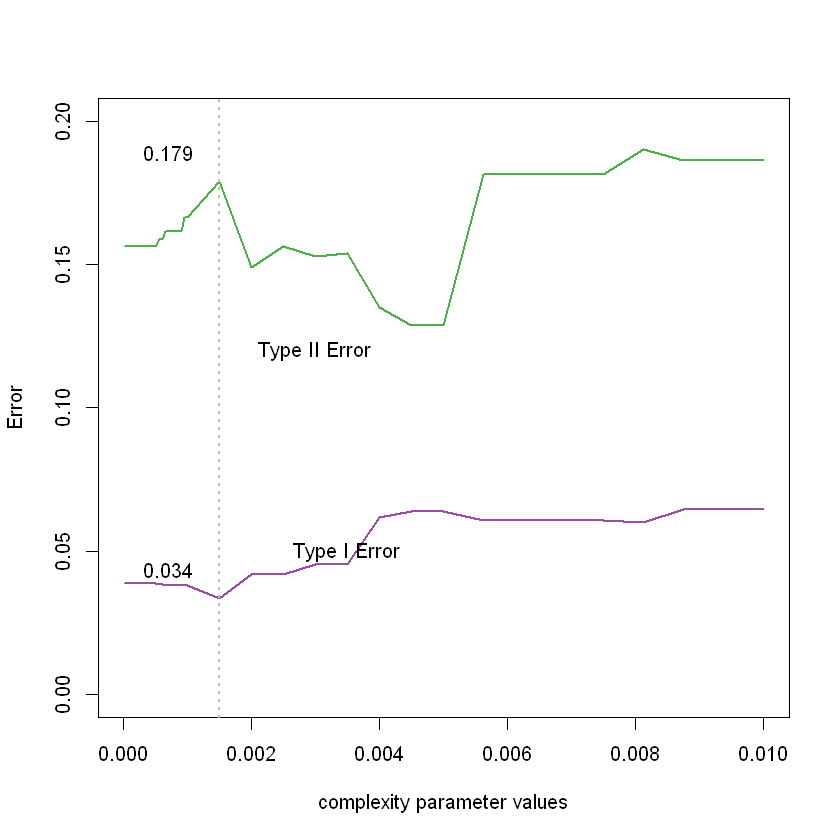

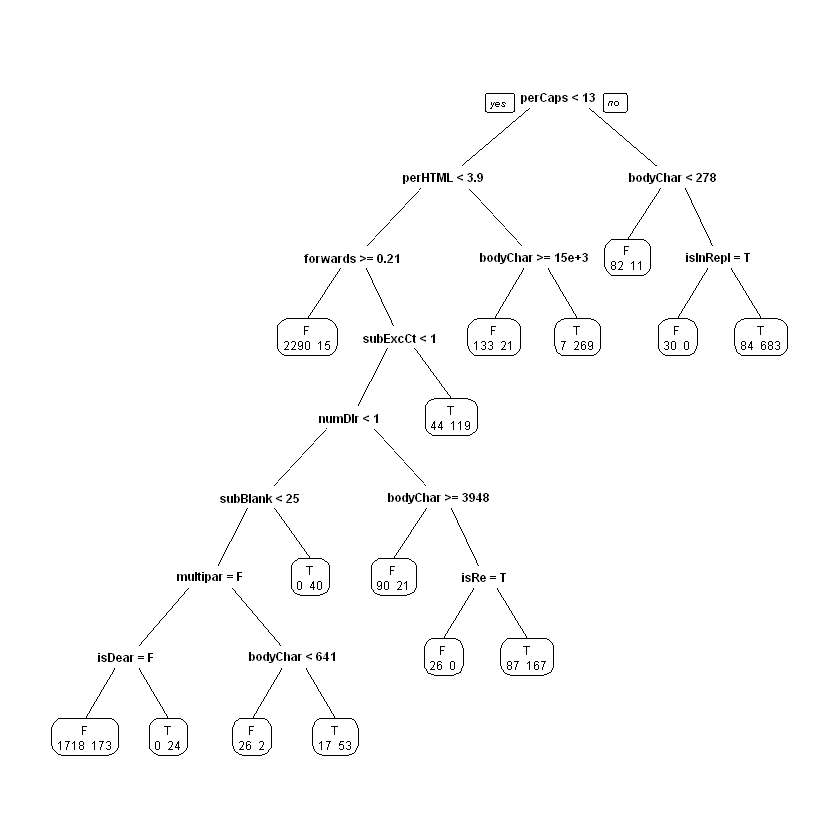

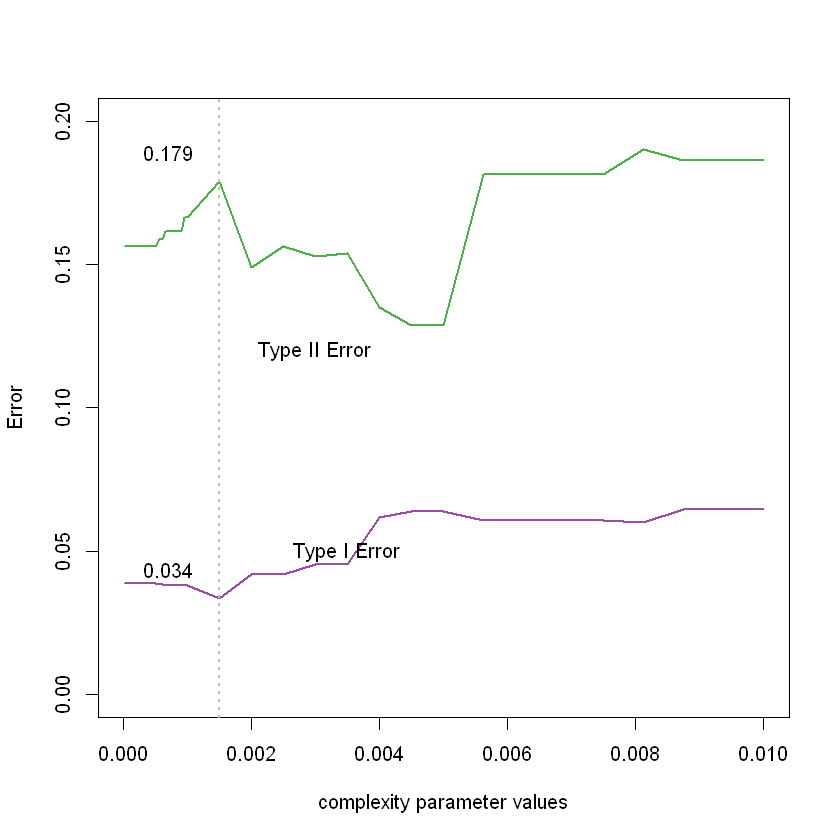

In [61]:
# this is to see how the cp will affect on the tree while holding others constant
rpartFit_cp_tweak1 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.0001))
rpartFitFunc(rpartFit_cp_tweak1,"rpartFit_cp_tweak1")
rpartFit_cp_tweak2 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.002))
rpartFitFunc(rpartFit_cp_tweak2,"rpartFit_cp_tweak2")
rpartFit_cp_tweak3 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.01))
rpartFitFunc(rpartFit_cp_tweak3,"rpartFit_cp_tweak3")

## Task 2
### rpartFit0 vanilla model without parameters tuning and compare performance of unpruned and pruned models
### set cp small and find optimal cp, then prune tree based on cp
prune fit0

In [62]:
#rpartFit0 vanilla model without parameters tuning
rpartFit0 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.0001, maxdepth=10, xval= 5, minsplit=20))

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


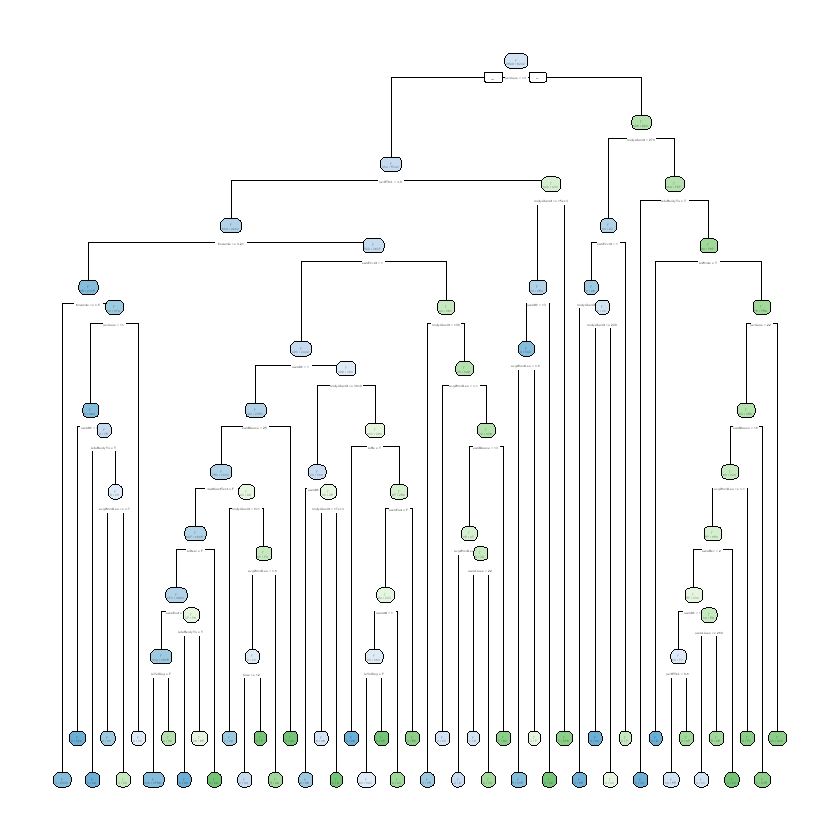

In [63]:
rpart.plot(rpartFit0  , extra = 3)

n= 6232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 6232 1598 F (0.743581515 0.256418485)  
     2) perCaps< 12.86122 5342  904 F (0.830774991 0.169225009)  
       4) perHTML< 3.926441 4912  614 F (0.875000000 0.125000000)  
         8) forwards>=0.2055889 2305   15 F (0.993492408 0.006507592)  
          16) forwards>=4.494949 2131    3 F (0.998592210 0.001407790) *
          17) forwards< 4.494949 174   12 F (0.931034483 0.068965517)  
            34) perCaps< 10.68646 164    8 F (0.951219512 0.048780488)  
              68) numDlr< 0.5 129    0 F (1.000000000 0.000000000) *
              69) numDlr>=0.5 35    8 F (0.771428571 0.228571429)  
               138) isInReplyTo=T 14    0 F (1.000000000 0.000000000) *
               139) isInReplyTo=F 21    8 F (0.619047619 0.380952381)  
                 278) avgWordLen>=4.725079 11    1 F (0.909090909 0.090909091) *
                 279) avgWordLen< 4.725079 10    3 T (0.300000000 0.700000000) *
    

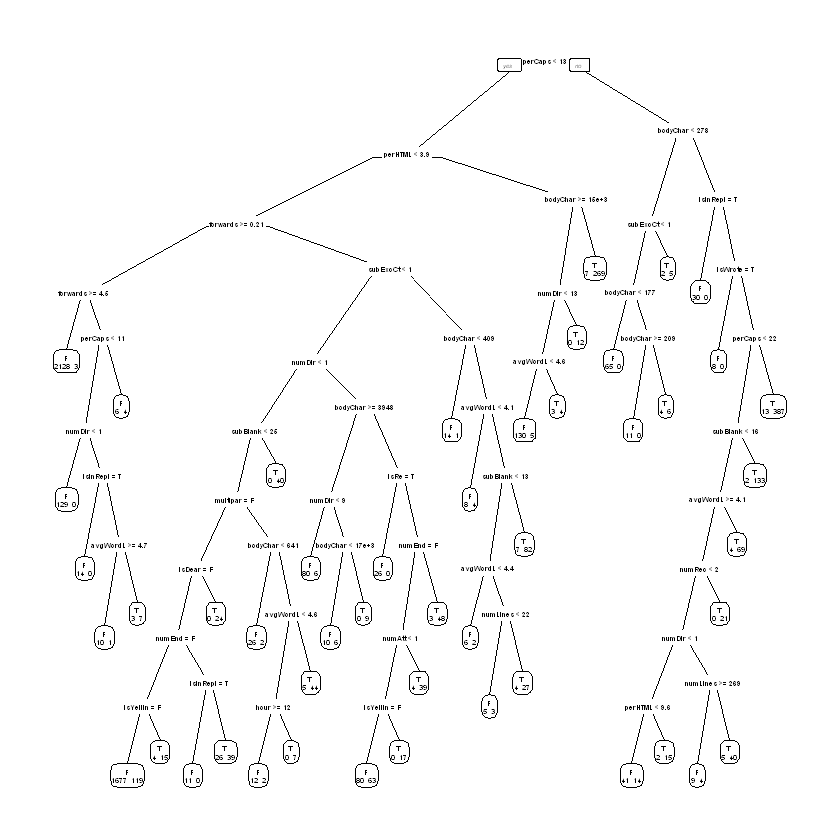

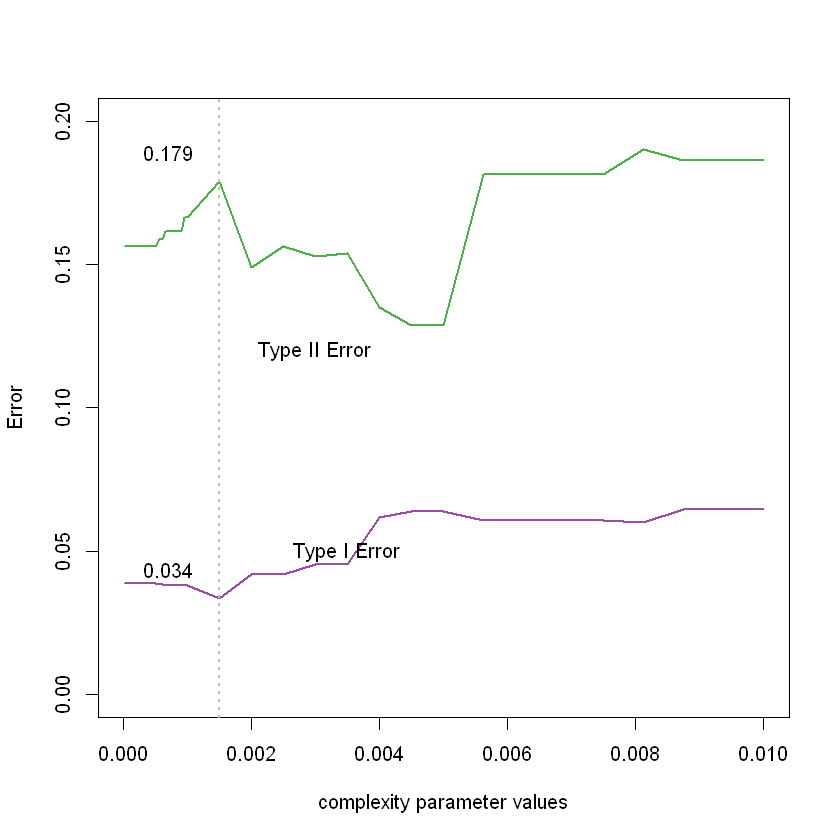

In [64]:
model0=rpartFitFunc(rpartFit0,'_0')

In [65]:
# Metric for rpartFit0
# testDF$isSpam

predicted0 <- predict(rpartFit0, newdata = testDF, type = "class")

#library(MLmetrics)


f1_val_rpartFit0 <- F1_Score(y_pred = predicted0 , y_true = testDF$isSpam, positive = "T")
precision_rpartFit0 <- Precision(y_pred = predicted0, y_true = testDF$isSpam, positive = "T")
recall_rpartFit0  <- Recall(y_pred = predicted0, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit0, precision_rpartFit0, recall_rpartFit0)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit0:")
return(result)

# f1_val_rpartFit0

[1] "Metrics for rpartFit0:"


F1-Score Precision    Recall 
0.8431502 0.8946629 0.7972466

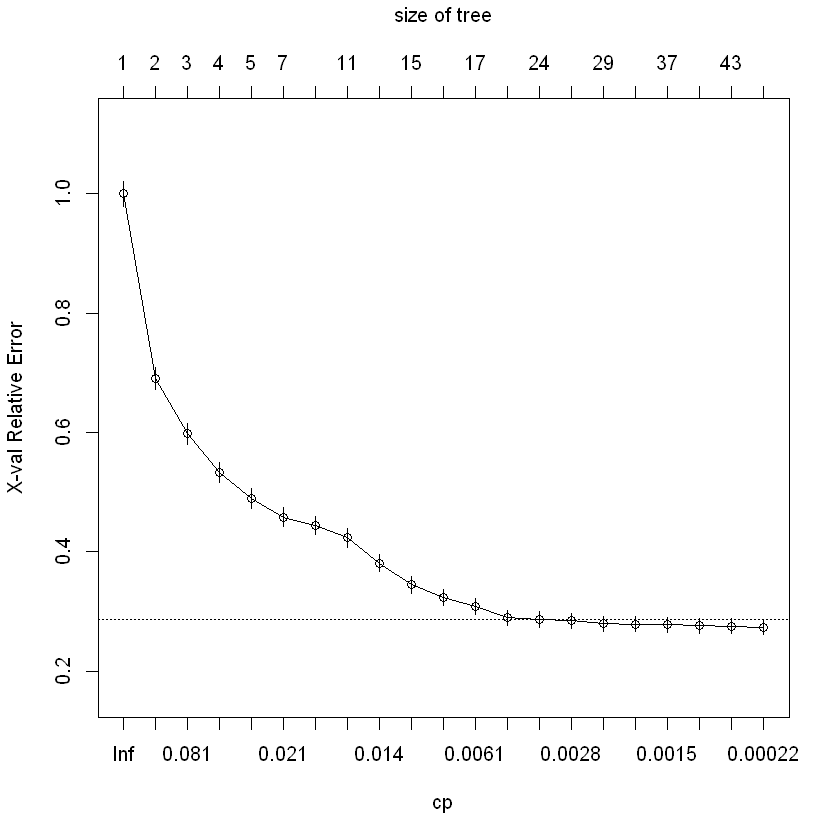

In [66]:
plotcp(rpartFit0)

In [67]:
printcp(rpartFit0) #rule of thumb to determine optimal cp value


Classification tree:
rpart(formula = isSpam ~ ., data = trainDF, method = "class", 
    control = rpart.control(cp = 1e-04, maxdepth = 10, xval = 5, 
        minsplit = 20))

Variables actually used in tree construction:
 [1] avgWordLen    bodyCharCt    forwards      hour          isDear       
 [6] isInReplyTo   isRe          isWrote       isYelling     multipartText
[11] numAtt        numDlr        numEnd        numLines      numRec       
[16] perCaps       perHTML       subBlanks     subExcCt     

Root node error: 1598/6232 = 0.25642

n= 6232 

           CP nsplit rel error  xerror     xstd
1  0.31163955      0   1.00000 1.00000 0.021571
2  0.09386733      1   0.68836 0.69086 0.018861
3  0.07008761      2   0.59449 0.59825 0.017803
4  0.04443054      3   0.52441 0.53317 0.016972
5  0.02346683      4   0.47997 0.48999 0.016374
6  0.01960784      6   0.43304 0.45807 0.015905
7  0.01877347      9   0.37422 0.44431 0.015696
8  0.01627034     10   0.35544 0.42365 0.015373
9  0.012515

In [68]:
#19 0.00219024     22   0.22403 0.25282 0.012164

0.25282+0.012164  #= 0.264984; so choose 16 0.00594493     17   0.24781 0.26408 0.012412
#good_cp=0.00594493 

[1] 0.264984

In [69]:
good_cp=0.00594493 

In [70]:
tree.fit0=prune(rpartFit0, cp= good_cp) # for vanilla model, prune tree based on cp

In [71]:
summary(tree.fit0)

Call:
rpart(formula = isSpam ~ ., data = trainDF, method = "class", 
    control = rpart.control(cp = 1e-04, maxdepth = 10, xval = 5, 
        minsplit = 20))
  n= 6232 

            CP nsplit rel error    xerror       xstd
1  0.311639549      0 1.0000000 1.0000000 0.02157128
2  0.093867334      1 0.6883605 0.6908636 0.01886114
3  0.070087610      2 0.5944931 0.5982478 0.01780290
4  0.044430538      3 0.5244055 0.5331665 0.01697151
5  0.023466834      4 0.4799750 0.4899875 0.01637377
6  0.019607843      6 0.4330413 0.4580726 0.01590547
7  0.018773467      9 0.3742178 0.4443054 0.01569592
8  0.016270338     10 0.3554443 0.4236546 0.01537255
9  0.012515645     11 0.3391740 0.3811014 0.01466906
10 0.008135169     14 0.3016270 0.3448060 0.01402483
11 0.007509387     15 0.2934919 0.3241552 0.01363781
12 0.005944930     16 0.2859825 0.3085106 0.01333371

Variable importance
      perCaps    bodyCharCt      numLines       perHTML        numDlr 
           23            14            12       

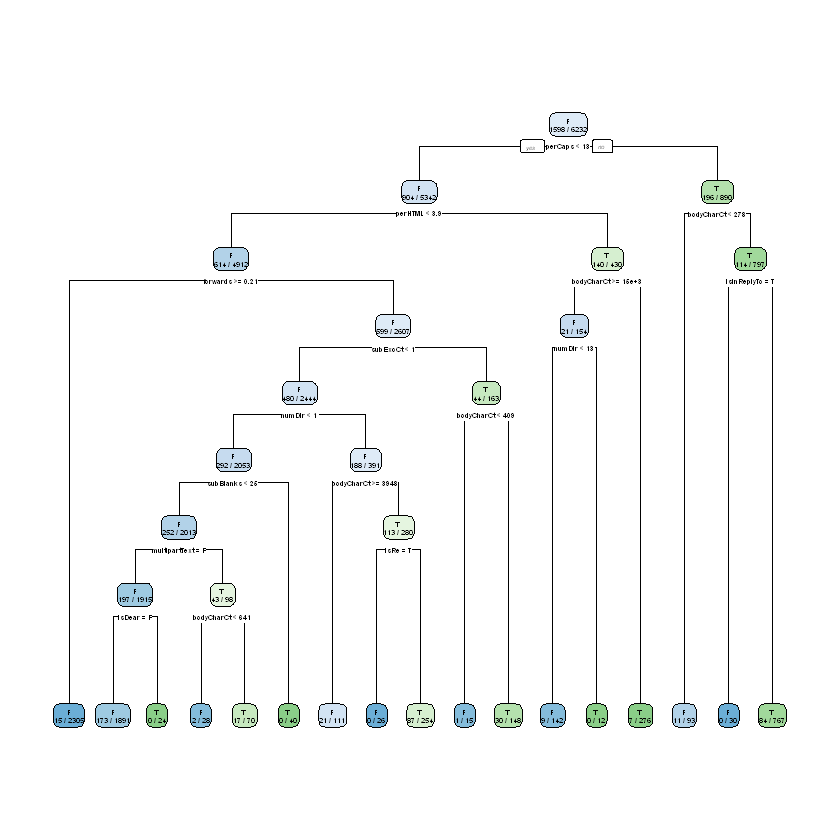

In [72]:
rpart.plot(tree.fit0, extra = 3)  #how to fix plot labels, can not see #maxdepth change from 10 to 4 after pruning

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


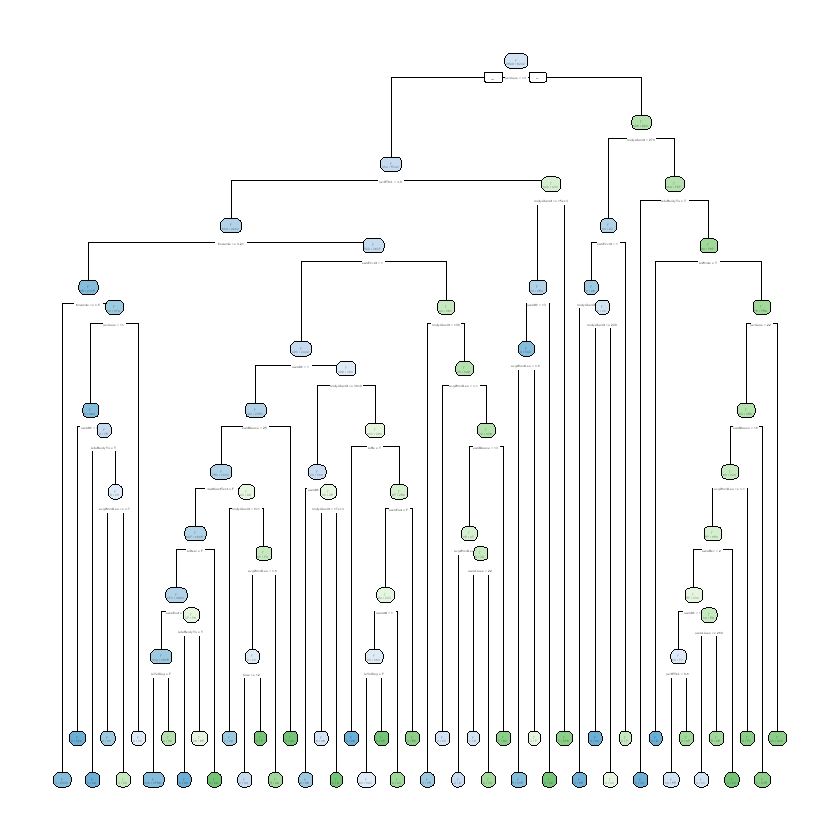

In [73]:
rpart.plot(rpartFit0  , extra = 3)

In [74]:
# Metric for tree.fit0 which is pruned rpartFit0

predicted0p <- predict(tree.fit0, newdata = testDF, type = "class")

#library(MLmetrics)


f1_val_rpartFit0p <- F1_Score(y_pred = predicted0p , y_true = testDF$isSpam, positive = "T")
precision_rpartFit0p <- Precision(y_pred = predicted0p, y_true = testDF$isSpam, positive = "T")
recall_rpartFit0p  <- Recall(y_pred = predicted0p, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit0p, precision_rpartFit0p, recall_rpartFit0p)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for pruned rpartFit0:")
return(result)

[1] "Metrics for pruned rpartFit0:"


F1-Score Precision    Recall 
0.8205772 0.8226415 0.8185232

[1] "Metrics for rpartFit0:"

F1-Score
0.868217054263566
Precision
0.897196261682243
Recall
0.841051314142678


[1] "Metrics for pruned rpartFit0:"

F1-Score
0.860952380952381
Precision
0.873711340206186
Recall
0.848560700876095


### from the results above, pruned model F1-Score and Precision decreased, Recall increase --reason?
#### the reason is cp value increased from 0.0001 to good_cp=0.00594493 

#### I prefer the pruned tree although the scores are little bit lower cause its easier to interpret and be able to see the labels easier.

## Task 3
#### focus on tuning cp and MaxDepth and keep other values constant.
(rpartFit 0-10. combination of 9, plus rpartFit0 - vanilla model.)

#### cp 0.0001  0.002  0.01

#### MaxDepth 4,6,10 

cp-- prevent overfitting. higher, less split. too low underfit; too high overfit. max value is 1

MaxDepth -- of the final tree

minsplit --any node with number of n will not get further split.
 the number of required classified observations in a node before a split can happen. seems default 20. set it to 10? or just keep 20.

xval -- the number (x) of cross validations to be carried out on the data. default 10. repeat 5 fold cross validation for 10 times.

did not test on other parameters like maxcomplete.

In [75]:
rpartFit1 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.0001, maxdepth=10, xval= 5, minsplit=20))
rpartFit2 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.002, maxdepth=10, xval= 5, minsplit=20))
rpartFit3 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.01, maxdepth=10, xval= 5, minsplit=20))
rpartFit4 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.0001, maxdepth=6, xval= 5, minsplit=20))
rpartFit5 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.002, maxdepth=6, xval= 5, minsplit=20))
rpartFit6 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.01, maxdepth=6, xval= 5, minsplit=20))
rpartFit7 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.0001, maxdepth=4, xval= 5, minsplit=20))
rpartFit8 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.002, maxdepth=4, xval= 5, minsplit=20))
rpartFit9 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.01, maxdepth=4, xval= 5, minsplit=20))

In [76]:
# model1=rpartFitFunc(rpartFit1,'_1')

In [77]:
# Metric for rpartFit1 (rpartFit1 is the same as rpartFit0)

predicted1<- predict(rpartFit1, newdata = testDF, type = "class")

f1_val_rpartFit1 <- F1_Score(y_pred = predicted1, y_true = testDF$isSpam, positive = "T")
precision_rpartFit1 <- Precision(y_pred = predicted1, y_true = testDF$isSpam, positive = "T")
recall_rpartFit1  <- Recall(y_pred = predicted1, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit1, precision_rpartFit1, recall_rpartFit1)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit1:")
return(result)


[1] "Metrics for rpartFit1:"


F1-Score Precision    Recall 
0.8431502 0.8946629 0.7972466

In [78]:
# Metric for rpartFit2

predicted2<- predict(rpartFit2, newdata = testDF, type = "class")

f1_val_rpartFit2 <- F1_Score(y_pred = predicted2, y_true = testDF$isSpam, positive = "T")
precision_rpartFit2 <- Precision(y_pred = predicted2, y_true = testDF$isSpam, positive = "T")
recall_rpartFit2  <- Recall(y_pred = predicted2, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit2, precision_rpartFit2, recall_rpartFit2)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit2:")
return(result)

[1] "Metrics for rpartFit2:"


F1-Score Precision    Recall 
0.8462038 0.8787062 0.8160200

In [79]:
# Metric for rpartFit3

predicted3<- predict(rpartFit3, newdata = testDF, type = "class")

f1_val_rpartFit3 <- F1_Score(y_pred = predicted3, y_true = testDF$isSpam, positive = "T")
precision_rpartFit3 <- Precision(y_pred = predicted3, y_true = testDF$isSpam, positive = "T")
recall_rpartFit3  <- Recall(y_pred = predicted3, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit3, precision_rpartFit3, recall_rpartFit3)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit3:")
return(result)

[1] "Metrics for rpartFit3:"


F1-Score Precision    Recall 
0.8130081 0.8125000 0.8135169

In [80]:
# Metric for rpartFit4

predicted4<- predict(rpartFit4, newdata = testDF, type = "class")


f1_val_rpartFit4 <- F1_Score(y_pred = predicted4, y_true = testDF$isSpam, positive = "T")
precision_rpartFit4 <- Precision(y_pred = predicted4, y_true = testDF$isSpam, positive = "T")
recall_rpartFit4  <- Recall(y_pred = predicted4, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit4, precision_rpartFit4, recall_rpartFit4)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit4:")
return(result)


[1] "Metrics for rpartFit4:"


F1-Score Precision    Recall 
0.7943626 0.8136483 0.7759700

In [81]:
# Metric for rpartFit5

predicted5<- predict(rpartFit5, newdata = testDF, type = "class")


f1_val_rpartFit5 <- F1_Score(y_pred = predicted5, y_true = testDF$isSpam, positive = "T")
precision_rpartFit5 <- Precision(y_pred = predicted5, y_true = testDF$isSpam, positive = "T")
recall_rpartFit5  <- Recall(y_pred = predicted5, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit5, precision_rpartFit5, recall_rpartFit5)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit5:")
return(result)


[1] "Metrics for rpartFit5:"


F1-Score Precision    Recall 
0.7940415 0.8228188 0.7672090

In [82]:
# Metric for rpartFit6

predicted6<- predict(rpartFit6, newdata = testDF, type = "class")


f1_val_rpartFit6 <- F1_Score(y_pred = predicted6, y_true = testDF$isSpam, positive = "T")
precision_rpartFit6 <- Precision(y_pred = predicted6, y_true = testDF$isSpam, positive = "T")
recall_rpartFit6  <- Recall(y_pred = predicted6, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit6, precision_rpartFit6, recall_rpartFit6)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit6:")
return(result)


[1] "Metrics for rpartFit6:"


F1-Score Precision    Recall 
0.7816092 0.7979140 0.7659574

In [83]:
# Metric for rpartFit7

predicted7<- predict(rpartFit7, newdata = testDF, type = "class")


f1_val_rpartFit7 <- F1_Score(y_pred = predicted7, y_true = testDF$isSpam, positive = "T")
precision_rpartFit7 <- Precision(y_pred = predicted7, y_true = testDF$isSpam, positive = "T")
recall_rpartFit7  <- Recall(y_pred = predicted7, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit7, precision_rpartFit7, recall_rpartFit7)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit7:")
return(result)


[1] "Metrics for rpartFit7:"


F1-Score Precision    Recall 
0.7223022 0.8494078 0.6282854

In [84]:
# Metric for rpartFit8

predicted8<- predict(rpartFit8, newdata = testDF, type = "class")


f1_val_rpartFit8 <- F1_Score(y_pred = predicted8, y_true = testDF$isSpam, positive = "T")
precision_rpartFit8 <- Precision(y_pred = predicted8, y_true = testDF$isSpam, positive = "T")
recall_rpartFit8  <- Recall(y_pred = predicted8, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit8, precision_rpartFit8, recall_rpartFit8)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit8:")
return(result)


[1] "Metrics for rpartFit8:"


F1-Score Precision    Recall 
0.7234657 0.8549488 0.6270338

In [85]:
# Metric for rpartFit9

predicted9<- predict(rpartFit9, newdata = testDF, type = "class")


f1_val_rpartFit9 <- F1_Score(y_pred = predicted9, y_true = testDF$isSpam, positive = "T")
precision_rpartFit9 <- Precision(y_pred = predicted9, y_true = testDF$isSpam, positive = "T")
recall_rpartFit9  <- Recall(y_pred = predicted9, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit9, precision_rpartFit9, recall_rpartFit9)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit9:")
return(result)


[1] "Metrics for rpartFit9:"


F1-Score Precision    Recall 
0.7149059 0.8473413 0.6182728

### Summary of results
[1] "Metrics for rpartFit1:"

F1-Score
0.868217054263566
Precision
0.897196261682243
Recall
0.841051314142678


[1] "Metrics for rpartFit2:"

F1-Score
0.866151866151866
Precision
0.891390728476821
Recall
0.842302878598248

[1] "Metrics for rpartFit3:"

F1-Score
0.843554443053817
Precision
0.843554443053817
Recall
0.843554443053817


[1] "Metrics for rpartFit4:"

F1-Score
0.816808929743926
Precision
0.859116022099447
Recall
0.778473091364205



[1] "Metrics for rpartFit5:"

F1-Score
0.817105263157895
Precision
0.86130374479889
Recall
0.777221526908636


[1] "Metrics for rpartFit6:"

F1-Score
0.805177993527508
Precision
0.833780160857909
Recall
0.778473091364205

[1] "Metrics for rpartFit7:"

F1-Score
0.752990851513019
Precision
0.860128617363344
Recall
0.669586983729662

[1] "Metrics for rpartFit8:"

F1-Score
0.752990851513019
Precision
0.860128617363344
Recall
0.669586983729662



[1] "Metrics for rpartFit9:"

F1-Score
0.748241912798875
Precision
0.853932584269663
Recall
0.665832290362954

### impact of change the parameters on models !!!!!!!!!!!!!!!!!!!!!!!  
#### From the results (better create table with columns: modelName, cp, maxdepth,F1-Score, Precision,Recall ), we can see the trend:
###  with the cp value increase, model performance decrease;
###  with maxdepth decrease, model performance decrease.


In [86]:
#try a higher maxdepth,  see if performance increase
rpartFit10 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.0001, maxdepth=14, xval= 5, minsplit=20))

In [87]:
# Metric for rpartFit10

predicted10<- predict(rpartFit10, newdata = testDF, type = "class")


f1_val_rpartFit10 <- F1_Score(y_pred = predicted10, y_true = testDF$isSpam, positive = "T")
precision_rpartFit10 <- Precision(y_pred = predicted10, y_true = testDF$isSpam, positive = "T")
recall_rpartFit10  <- Recall(y_pred = predicted10, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit10, precision_rpartFit10, recall_rpartFit10)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit10:")
return(result)

#compare with Fit1, performance increase: F1 and Recall incease, Precision decrease a bit

[1] "Metrics for rpartFit10:"


F1-Score Precision    Recall 
0.8564003 0.8905405 0.8247810

In [88]:
#try a smaller cp,  see if performance increase
rpartFit11= rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.00005, maxdepth=10, xval= 5, minsplit=20))

In [89]:
# Metric for rpartFit11

predicted11<- predict(rpartFit11, newdata = testDF, type = "class")


f1_val_rpartFit11 <- F1_Score(y_pred = predicted11, y_true = testDF$isSpam, positive = "T")
precision_rpartFit11 <- Precision(y_pred = predicted11, y_true = testDF$isSpam, positive = "T")
recall_rpartFit11  <- Recall(y_pred = predicted11, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit11, precision_rpartFit11, recall_rpartFit11)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit11:")
return(result)

##performance stay the same
# [1] "Metrics for rpartFit1:"
# F1-Score 0.868217054263566 Precision 0.897196261682243 Recall 0.841051314142678

[1] "Metrics for rpartFit11:"


F1-Score Precision    Recall 
0.8431502 0.8946629 0.7972466

In [90]:
# model10=rpartFitFunc(rpartFit10 ,'_10')

### rpartFit10 with maxdepth =14 is the best model we got so far. however, we can not increase maxdepth infinitely since it cause overfitting.

### let's compare the trees of rpartFit1 and rpartFit10 which are the best models we got so far to make a final decision on which model to choose.


Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


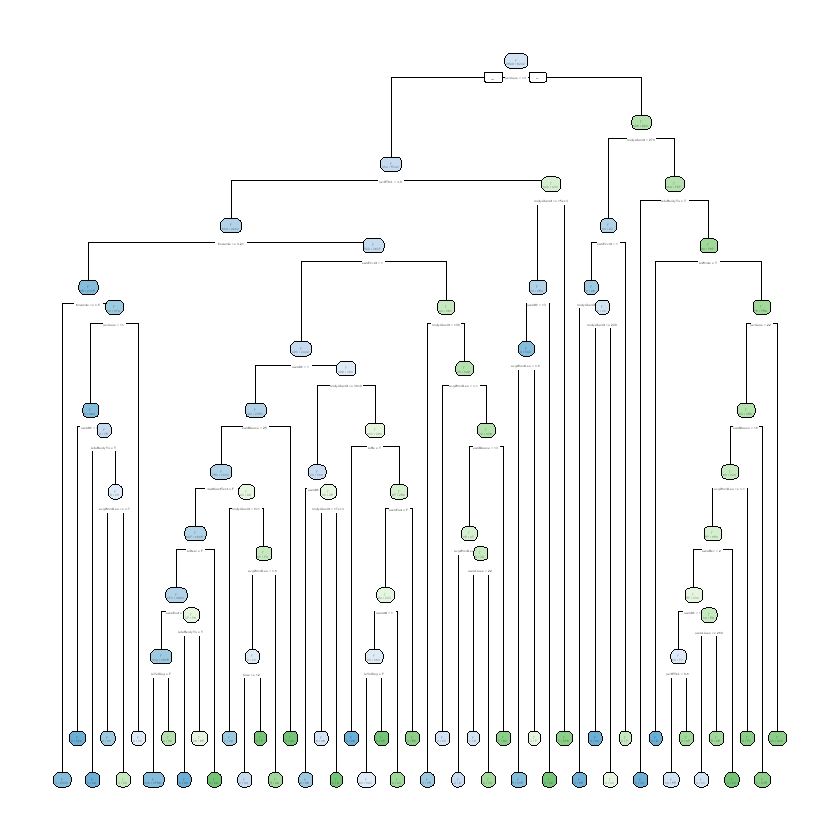

In [91]:
rpart.plot(rpartFit1  , extra = 3)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


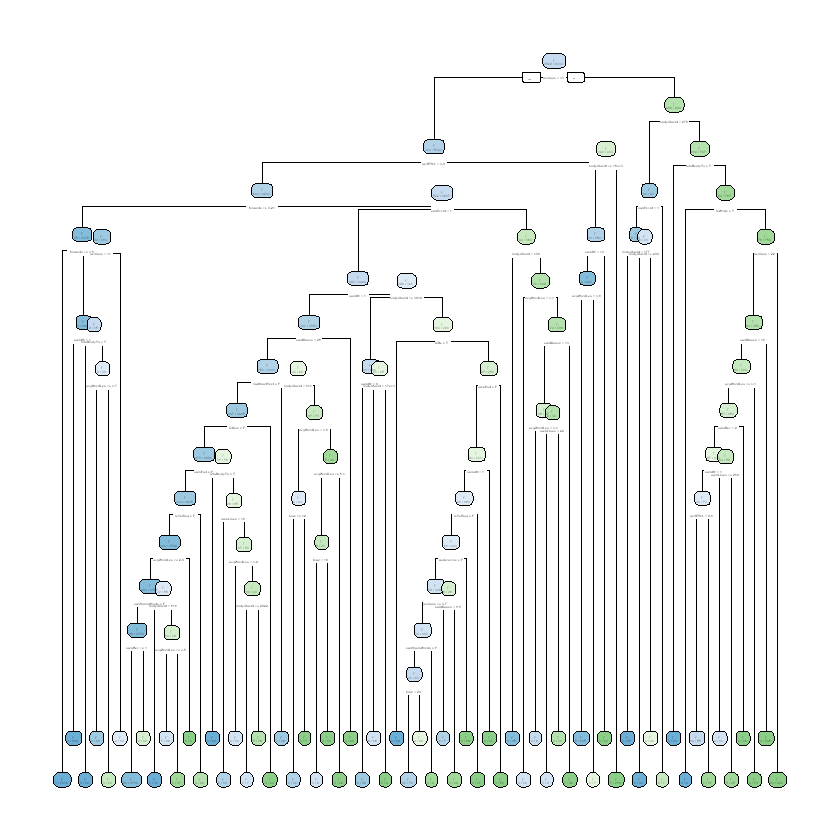

In [92]:
rpart.plot(rpartFit10  , extra = 3)

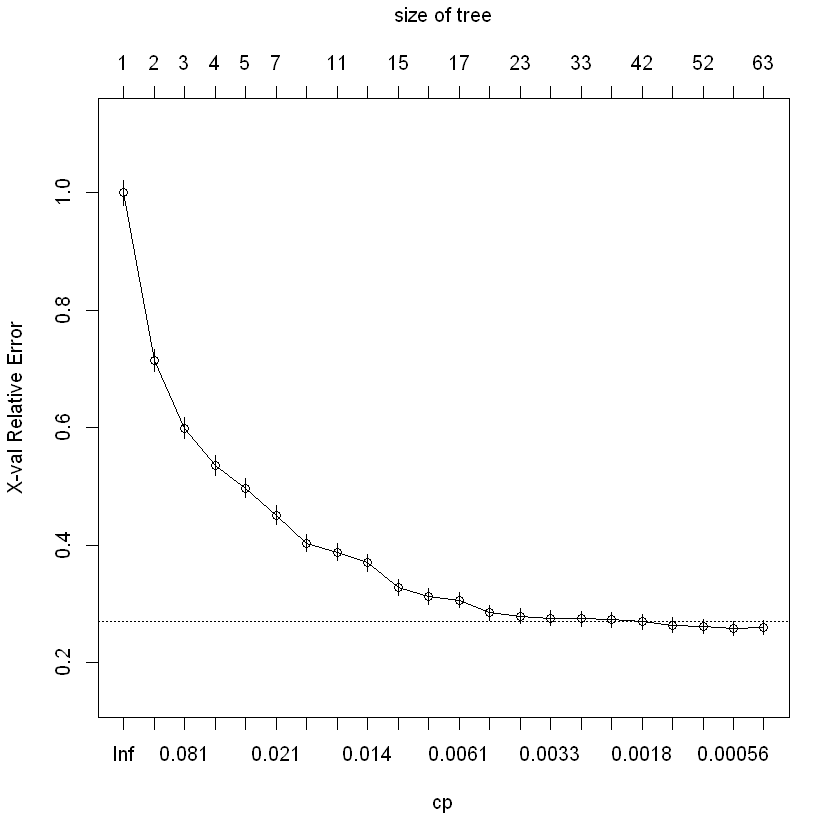

In [93]:
# let's prune rpartFit10 and compare with pruned rpartFit1

plotcp(rpartFit10)

In [94]:
printcp(rpartFit10) #rule of thumb to determine optimal cp value


Classification tree:
rpart(formula = isSpam ~ ., data = trainDF, method = "class", 
    control = rpart.control(cp = 1e-04, maxdepth = 14, xval = 5, 
        minsplit = 20))

Variables actually used in tree construction:
 [1] avgWordLen    bodyCharCt    forwards      hour          isDear       
 [6] isInReplyTo   isRe          isWrote       isYelling     multipartText
[11] numAtt        numDlr        numEnd        numLines      numRec       
[16] perCaps       perHTML       subBlanks     subExcCt      subSpamWords 
[21] underscore   

Root node error: 1598/6232 = 0.25642

n= 6232 

           CP nsplit rel error  xerror     xstd
1  0.31163955      0   1.00000 1.00000 0.021571
2  0.09386733      1   0.68836 0.71464 0.019112
3  0.07008761      2   0.59449 0.59950 0.017818
4  0.04443054      3   0.52441 0.53504 0.016997
5  0.02346683      4   0.47997 0.49687 0.016472
6  0.01960784      6   0.43304 0.45119 0.015801
7  0.01877347      9   0.37422 0.40363 0.015048
8  0.01627034     10   0.3

In [95]:
# 24 0.00093867     43   0.17647 0.24093 0.011893
0.24093+0.011893 #=0.252823, so choose 20 0.00219024     25   0.20713 0.24906 0.012079

#good_cp10=0.00219024

[1] 0.252823

In [96]:
good_cp10=0.00219024

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


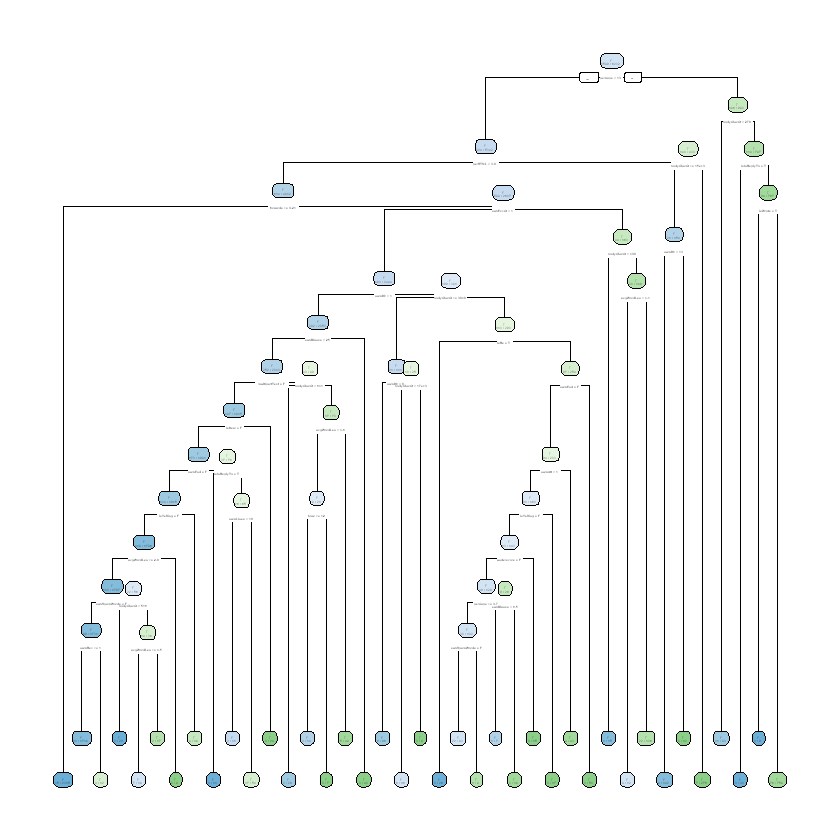

In [97]:
tree.fit10=prune(rpartFit10, cp= good_cp10)

rpart.plot(tree.fit10, extra = 3)

In [98]:
png("treefit10.png", width=1000, height=800, antialias="cleartype")
rpart.plot(tree.fit10, extra = 3)
dev.off()

png 
  2

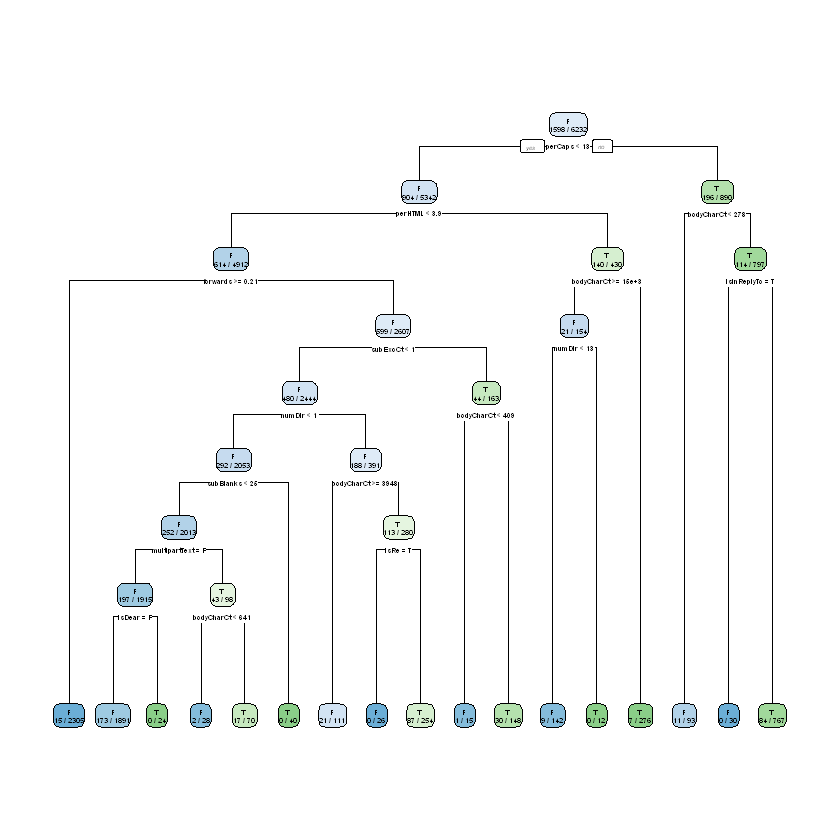

In [99]:
rpart.plot(tree.fit0, extra = 3)

In [100]:
png("treefit1.png", width=1000, height=800, antialias="cleartype")
rpart.plot(tree.fit0, extra = 3)
dev.off()  #save the tree plot in png. so can zoom in and see the labels

png 
  2

In [101]:
# summary(rpartFit10)

In [102]:
# summary(tree.fit10)


In [103]:
# Metric for tree.fit10 which is pruned rpartFit10

predicted10p <- predict(tree.fit10, newdata = testDF, type = "class")

f1_val_rpartFit10p <- F1_Score(y_pred = predicted10p , y_true = testDF$isSpam, positive = "T")
precision_rpartFit10p <- Precision(y_pred = predicted10p, y_true = testDF$isSpam, positive = "T")
recall_rpartFit10p  <- Recall(y_pred = predicted10p, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit10p, precision_rpartFit10p, recall_rpartFit10p)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for pruned rpartFit10:")
return(result)



[1] "Metrics for pruned rpartFit10:"


F1-Score Precision    Recall 
0.8585987 0.8741894 0.8435544

In [104]:
# compare results:

# [1] "Metrics for pruned rpartFit1:"

# F1-Score
# 0.860952380952381
# Precision
# 0.873711340206186
# Recall
# 0.848560700876095

# [1] "Metrics for pruned rpartFit10:"

# F1-Score
# 0.867637745408486
# Precision
# 0.878205128205128
# Recall
# 0.857321652065081



## Conclusion for task 3
### pruned rpartFit10 outperformed pruned rpartFit1
### so parameter tuning improved the prediction

### however, pruned rpartFit1 is easier to interpret based on the plot.
-------------------------------------------------------

## Task 4 Alternative method to find optimal cp value
### use rpart package see how the cp will affect on the tree while holding others constant
#### caret package can grid search cp, also print F1, prec, rec

__DD:__ I was getting error _"object f1 not found"_ so added the function provided by Dr. Slater to run prior to the next cell

In [106]:
#Function from Dr. Slater
library(MLmetrics)
f1 <- function(data, lev = NULL, model = NULL) {
  f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  fp <-sum(data$pred==0 & data$obs==1)/length(data$pred)  
 
  fn <-sum(data$pred==1 & data$obs==0)/length(data$pred)
    c(F1 = f1_val,
    prec = p,
    rec = r,
    Type_I_err=fp,
    Type_II_err=fn
   )
}

In [107]:


setupRnum = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.numeric(x)
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFnum = setupRnum(emailDF)

emailDFnum[is.na(emailDFnum)]<-0

library(caret)
val<-seq(from = 0, to=0.002, by=0.00005)
cart_grid<-expand.grid(cp=val)
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1)
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='rpart',tuneGrid = cart_grid)
model_rpart

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. F1 will be used instead."


CART 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7478, 7479, 7478, 7479 
Resampling results across tuning parameters:

  cp       F1         prec       rec        Type_I_err  Type_II_err
  0.00000  0.9597044  0.9551641  0.9643212  0.03369608  0.02652996 
  0.00005  0.9597044  0.9551641  0.9643212  0.03369608  0.02652996 
  0.00010  0.9597099  0.9550331  0.9644651  0.03380309  0.02642295 
  0.00015  0.9597846  0.9550384  0.9646090  0.03380309  0.02631594 
  0.00020  0.9599280  0.9551849  0.9647528  0.03369613  0.02620887 
  0.00025  0.9599339  0.9550587  0.9648965  0.03380309  0.02610192 
  0.00030  0.9600160  0.9549511  0.9651841  0.03390998  0.02588802 
  0.00035  0.9600057  0.9552189  0.9648963  0.03369596  0.02610204 
  0.00040  0.9599377  0.9550864  0.9648963  0.03380291  0.02610204 
  0.00045  0.9599377  0.9550864  0.9648963  0.03380291  0.02610204 
  0.00050  0.9599377  0.9550864  0.

### since we want typeI error to be low, 
#### lowest  type I error occur around cp=0.00075 
#### lowest  type II error occur around cp=0.00100 

#### if we want best F1 score, it also happens around cp=0.00100 


In [108]:
# parameter  different from the best model what we found above
# rpartFit10 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.0001, maxdepth=14, xval= 5, minsplit=20))
rpartFit12= rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.00075, maxdepth=14, xval= 5, minsplit=20))

In [109]:
# Metric for rpartFit12

predicted12<- predict(rpartFit12, newdata = testDF, type = "class")


f1_val_rpartFit12 <- F1_Score(y_pred = predicted12, y_true = testDF$isSpam, positive = "T")
precision_rpartFit12 <- Precision(y_pred = predicted12, y_true = testDF$isSpam, positive = "T")
recall_rpartFit12  <- Recall(y_pred = predicted12, y_true = testDF$isSpam, positive = "T")

result <- c( f1_val_rpartFit12, precision_rpartFit12, recall_rpartFit12)

names(result) <- c("F1-Score","Precision", "Recall")
print("Metrics for rpartFit12:")
return(result)

[1] "Metrics for rpartFit12:"


F1-Score Precision    Recall 
0.8513158 0.8973648 0.8097622

### performance increased after parameters tuning

### create table to compare!!!!!!!!!!!!!!!!!!!!!!!!  (table with columns: modelName, cp, maxdepth,F1-Score, Precision,Recall )

### Summary of results
first model
[1] "Metrics for rpartFitCpExperiment:"

F1-Score
0.867972204674668
Precision
0.876275510204082
Recall
0.85982478097622


[1] "Metrics for rpartFit0:"  #treefit1.png

F1-Score
0.868217054263566
Precision
0.897196261682243
Recall
0.841051314142678


[1] "Metrics for rpartFit10:" #treefit10.png

F1-Score
0.869009584664537
Precision
0.887728459530026
Recall
0.851063829787234


[1] "Metrics for rpartFit12:"

F1-Score
0.870782940802037
Precision
0.886010362694301
Recall
0.856070087609512

In [110]:
# first model
# [1] "Metrics for rpartFitCpExperiment:"

# F1-Score
# 0.867972204674668
# Precision
# 0.876275510204082
# Recall
# 0.85982478097622


# [1] "Metrics for rpartFit0:"  #treefit1.png

# F1-Score
# 0.868217054263566
# Precision
# 0.897196261682243
# Recall
# 0.841051314142678


# [1] "Metrics for rpartFit10:" #treefit10.png

# F1-Score
# 0.869009584664537
# Precision
# 0.887728459530026
# Recall
# 0.851063829787234


# [1] "Metrics for rpartFit12:"

# F1-Score
# 0.870782940802037
# Precision
# 0.886010362694301
# Recall
# 0.856070087609512

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


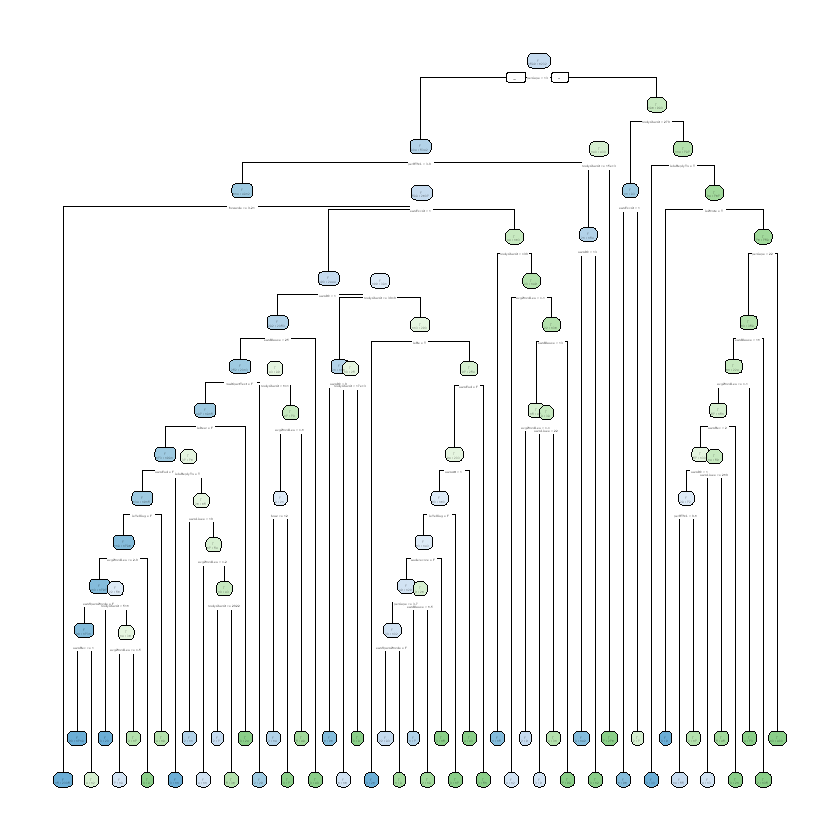

In [111]:
rpart.plot(rpartFit12  , extra = 3)

In [112]:
png("treefit12.png", width=1000, height=800, antialias="cleartype")
rpart.plot(rpartFit12, extra = 3)
dev.off()  #save the tree plot in png. so can zoom in and see the labels

png 
  2

In [113]:
# summary(rpartFit12)

In [114]:
rpartFit10$variable.importance

perCaps    bodyCharCt      numLines       perHTML        numDlr 
  608.7167691   411.1363400   362.0050216   286.6284992   174.8651181 
   avgWordLen      forwards   isInReplyTo          isRe     subBlanks 
  172.4744371   147.4517083   143.9253663   112.3123465    95.0167112 
     subExcCt       isWrote        numEnd        numRec multipartText 
   92.5897250    91.2758985    54.2745321    52.8551509    49.3549746 
       numAtt        isDear     isYelling          hour    underscore 
   43.7946319    39.5615004    37.4476655    36.6604838    25.1621734 
 subSpamWords     subQuesCt   isPGPsigned      priority     sortedRec 
   22.2900256    10.3660243     5.6697060     5.0321976     3.7552419 
    isOrigMsg        noHost     hasImages       subPunc 
    3.0551347     2.7700227     1.9230664     0.6958528

In [115]:
rpartFit12$variable.importance

perCaps    bodyCharCt      numLines       perHTML        numDlr 
  605.0095125   399.3828440   353.3396811   285.4970706   170.3634416 
   avgWordLen   isInReplyTo      forwards          isRe      subExcCt 
  159.5490598   141.4872711   141.3039519   110.7449996    92.5897250 
    subBlanks       isWrote        numEnd        numRec multipartText 
   91.2505797    89.3602523    54.2745321    52.8551509    49.3549746 
       numAtt        isDear     isYelling          hour    underscore 
   43.7946319    39.1225586    37.4476655    25.4605319    25.1621734 
 subSpamWords     subQuesCt   isPGPsigned      priority     sortedRec 
   20.4888231    10.3660243     5.6697060     5.0321976     3.7552419 
    isOrigMsg        noHost     hasImages       subPunc 
    3.0551347     2.7700227     1.6820958     0.2271028

In [116]:
rpartFitCpExperiment$variable.importance

perCaps    bodyCharCt      numLines       perHTML        numDlr 
  603.4482230   393.7254711   344.1590795   271.4042677   159.2896836 
  isInReplyTo    avgWordLen      forwards          isRe       isWrote 
  141.2601682   139.7618826   139.4110087   110.5306258    88.5781493 
     subExcCt     subBlanks multipartText        numEnd        numAtt 
   87.2118091    71.0587370    49.3549746    48.5059496    42.7912353 
       numRec        isDear     isYelling    underscore          hour 
   41.0907467    39.1225586    32.5346504    25.1621734    23.9239845 
 subSpamWords     subQuesCt      priority   isPGPsigned        noHost 
   20.4888231    12.4759144     5.0321976     4.5609679     2.6186208 
    isOrigMsg       subPunc     hasImages 
    1.9463967     1.0181127     0.8012616

In [117]:
#model 10 and 12 very similar feature importance

# NEED TO WRITE : intepret a tree based on plot and feature importance
# only tree fit 1 is able to see labels.

In [118]:
# rpartFitFunc(rpartFit12,'_12')

__Dan:__ Question 20 begins here. Dr. Slater did most of the work for us. I marked each portion of the code where as it relates to the question in the book.

### Q.20 
__Textbook question 20__  
 In Section 3.6.3 we used the test set that we had put aside to both select τ, the threshold for the log odds, and to evaluate the Type I and II errors incurred when we use this threshold. Ideally, we choose τ from another set of messages that is both independent of our training data and our test data. The method of cross-validation is designed to use the training set for training and validating the model. Implement 5-fold cross-validation to choose τ and assess the error rate with our training data. To do this, follow the steps:  
 __(a)__ Use the sample() function to permute the indices of the training set, and organize these permuted indices into 5 equal-size sets, called folds.  
 __(b)__ For each fold, take the corresponding subset from the training data to use as a ‘test’ set. Use the remaining messages in the training data as the training set. Apply the functions developed in Section 3.6 to estimate the probabilities that a word occurs in a message given it is spam or ham, and use these probabilities to compute the log likelihood ratio for the messages in the training set.  
 __(c)__ Pool all of the LLR values from the messages in all of the folds, i.e., from all of the training data, and use these values and the typeIErrorRate() function to select a threshold that achieves a 1% Type I error.  
 __(d)__ Apply this threshold to our original/real test set and ﬁnd its Type I and Type II errors. 


__Dr. Slater:__ Ok so first of all our data is in T/F 'factors'.  
We need to change it to numbers.  And as it turns out, there are quite a few NANs as well.  Let's set those to zero because imputation was 9 weeks ago

In [119]:
setupRnum = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.numeric(x)
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFnum = setupRnum(emailDF)

emailDFnum[is.na(emailDFnum)]<-0

__Dr Slater:__ I think i may skip this and see if I can get the folds to work internally to caret
However, one way to define your folds is to set a seed, and have your folds in a list that you can pass on to others to get the same splits.

__Textbook question 20 (a)__ _Use the sample() function to permute the indices of the training set, and organize these permuted indices into 5 equal-size sets, called folds._  

__Dan:__ This code below provded by Dr. Slater does just that.

In [120]:
cv_folds <- createFolds(emailDFnum$isSpam, k=5, list=TRUE, returnTrain = TRUE)
lengths(cv_folds)

Fold1 Fold2 Fold3 Fold4 Fold5 
 7478  7478  7479  7479  7478

__Textbook question 20 (b)__
_For each fold, take the corresponding subset from the training data to use as a ‘test’ set. Use the remaining messages in the training data as the training set. Apply the functions developed in Section 3.6 to estimate the probabilities that a word occurs in a message given it is spam or ham, and use these probabilities to compute the log likelihood ratio for the messages in the training set._

__Dan:__ The caret package can does this for us using resampling. https://cran.csiro.au/web/packages/caret/vignettes/caret.html  
See below excerpt from the documentation:

<img src="./Plots/WhatCaretDoes.PNG">

In [121]:
library(caret)

__Dan:__ I noted that Caret documentation says  _"By default, createDataPartition does a stratified random split of the data."_  
__Dan:__ We already did stratification when we ran the following code:

In [122]:
# set.seed(418910)
# testSpamIdx = sample(numSpam, size = floor(numSpam/3))
# testHamIdx = sample(numHam, size = floor(numHam/3))

# testDF = 
#   rbind( emailDFrp[emailDFrp$isSpam == "T", ][testSpamIdx, ],
#          emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
# trainDF =
#   rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
#          emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

__Dr. Slater:__ Finally Metric Stuff
Because our authors prefer Type I/II errors, but the cool kids know that precision/recall/F1 is where its at, while the default of caret is accuracy and kappa.  To get us all on the same page, I create a function that returns the metrics we want.  However, rather than re-invent the wheel, I just install a package.  I am not sure if it had Type I/II errors so those I made my self.  \#MLSwag

In [123]:
library(MLmetrics)
f1 <- function(data, lev = NULL, model = NULL) {
  f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  fp <-sum(data$pred==0 & data$obs==1)/length(data$pred)  
 
  fn <-sum(data$pred==1 & data$obs==0)/length(data$pred)
    c(F1 = f1_val,
    prec = p,
    rec = r,
    Type_I_err=fp,
    Type_II_err=fn
   )
}

__Dr. Slater:__ ok so lets get the naive bayes packages installed. (first 2 lines)
The next line makes a dataframe of all the parameters to check.  
If you don't know what they are, look them up
https://topepo.github.io/caret/available-models.html

Then we create a trainControl object.  It tells caret how to train--using a cross-validation ('cv') with 3 folds in this case (number = 3).  We want the final predictions of the best model and our summary is the custom function from above.

Then we create our model: "model_nb".  We user the caret::train method.  We make 'isSpam' a factor because R is dumb and can't figure out that 1 and 0 are classes.  
*as.factor(isSpam) ~ .*  means Y=as.factor(isSpam), X=everything else.
    
*method* is the package we are using, and we pass our tuning grid.

__Dan__: I comment out the original line of code provided by Dr. Slater that had # of folds = 3 and replace it with a new line with folds = 5 as per the instructions for Q20.  Dr. Slater has a comment about this at the end. _"Did the boss fool us with the folds?  Nope."_

We get errors "bw is not positive" whenever we have usekernal=true and adjust=false. I can't seem to figure out why. I think this is ok and will not have a significant affect the output .

In [124]:
library(naivebayes)
library(e1071)
nb_grid<-expand.grid(laplace=c(0,0.1,0.3,0.5,1), usekernel=c(T,F), adjust=c(T,F))
#train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
train_control<-trainControl(method="cv", number=5, savePredictions = 'final',summaryFunction = f1)
model_nb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='naive_bayes',tuneGrid = nb_grid)
model_nb

naivebayes 0.9.6 loaded

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. F1 will be used instead."
Warning message:
"model fit failed for Fold1: laplace=0.0, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"
Warning message:
"model fit failed for Fold1: laplace=0.1, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"
Warning message:
"model fit failed for Fold1: laplace=0.3, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"
Warning message:
"model fit failed for Fold1: laplace=0.5, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"
Warning message:
"model fit failed for Fold1: laplace=1.0, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"
Warning message:
"model fit fai

Naive Bayes 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7478, 7478, 7479, 7478, 7479 
Resampling results across tuning parameters:

  laplace  usekernel  adjust  F1         prec       rec        Type_I_err
  0.0      FALSE      FALSE   0.9243525  0.9337951  0.9154099  0.04845933
  0.0      FALSE       TRUE   0.9243525  0.9337951  0.9154099  0.04845933
  0.0       TRUE      FALSE         NaN        NaN        NaN         NaN
  0.0       TRUE       TRUE   0.8970192  0.8142110  0.9987052  0.16966218
  0.1      FALSE      FALSE   0.9243525  0.9337951  0.9154099  0.04845933
  0.1      FALSE       TRUE   0.9243525  0.9337951  0.9154099  0.04845933
  0.1       TRUE      FALSE         NaN        NaN        NaN         NaN
  0.1       TRUE       TRUE   0.8970192  0.8142110  0.9987052  0.16966218
  0.3      FALSE      FALSE   0.9243525  0.9337951  0.9154099  0.04845933
  0.3      FALSE       TRUE   0.9243

In [125]:
#Did the boss fool us with the folds?  Nope.
table(model_nb$pred['Resample'])


Fold1 Fold2 Fold3 Fold4 Fold5 
 1870  1870  1869  1870  1869 